# **Project Name**    - **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Dinesh Halder


# **Project Summary -**

In this project, I tackled the common challenge faced by bike rental companies: predicting bike demand accurately. By leveraging a regression supervised machine learning approach, I aimed to develop a model that optimizes inventory and pricing strategies based on various factors. The dataset originally included bike rental details, such as the number of bikes rented, date and time of rental, and diverse weather and seasonality features. Additionally, it encompassed information on influential factors like holidays and operational status.

Following thorough preprocessing and data cleaning, I partitioned the dataset into training and test sets, utilizing the former for model training. I experimented with multiple model architectures and hyperparameter configurations, ultimately selecting the one that demonstrated superior performance on the test data.

Beyond overall model assessment, I conducted ablation studies to discern the impact of individual features on performance. Results indicated that temperature, as well as weather and seasonality features, wielded the most significant influence on bike demand.

Upon successful model development, I deployed it in a live production environment and implemented ongoing performance monitoring. The model consistently demonstrated real-time accuracy, empowering the bike sharing company to make well-informed decisions regarding inventory management and pricing strategies.

# **Problem Statement**


This project tackles the important task of accurately forecasting the demand for bicycles at a given point in time for a bicycle rental company. Accurate demand forecasting is important for these companies, allowing them to fine-tune inventory and pricing policies to better meet consumer needs Sake demand forecasting has proven difficult due to for a variety of reasons such as timing, weather and local events. The development of a machine learning algorithm capable of accurately predicting demand enables bike rental companies to improve decision-making processes, resulting in better allocation and improved customer service.

1. **Objective:** The project aims to solve the challenge of accurately forecasting bike demand over a specific time period for a bike rental company.

2. **Importance:** Accurate demand predictions are crucial for optimizing inventory and pricing strategies, allowing bike rental companies to efficiently meet customer needs.

3. **Complexity of Prediction:** Predicting bike demand is challenging due to the diverse array of influencing factors, including the date and time of rental, weather conditions, and local events.

4. **Machine Learning Solution:** The project involves developing a machine learning model tailored for precise bike demand prediction, providing a data-driven approach to decision-making.

5. **Resource Allocation:** The accurate prediction of bike demand enables bike rental companies to allocate resources effectively, optimizing their operational efficiency.

6. **Dataset Features:** The dataset incorporates various features such as date, rented bike count, hour, temperature, humidity, wind speed, visibility, dew point temperature, solar radiation, rainfall, snowfall, seasons, holiday, and functioning day.

7. **Comprehensive Understanding:** These features collectively contribute to a comprehensive understanding of the intricate dynamics influencing bike demand, allowing for a nuanced predictive model.

8. **Operational Efficiency:** Implementing the machine learning model enhances operational efficiency, enabling bike rental companies to make informed decisions about inventory management and customer service.

9. **Customer Service Optimization:** Accurate demand predictions contribute to improved customer service, ensuring that bike rental companies can better cater to the evolving needs of their clientele.

10. **Continuous Monitoring:** Post-deployment, the model undergoes continuous monitoring to ensure its real-time accuracy and effectiveness in supporting decision-making for the bike rental company.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import calendar


from scipy.stats import pearsonr
from scipy.stats import f_oneway

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error, r2_score
from sklearn.metrics import accuracy_score

### Dataset Loading

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Link and load data set

data_set=pd.read_csv("/content/drive/MyDrive/ML case study/SeoulBikeData.csv",encoding = "ISO-8859-1") # # UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte



### Dataset First View

In [ ]:
# Dataset First Look

display(data_set) # 5 rows from head and tail of the data set


Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

num_rows, num_columns = data_set.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")


Number of Rows: 8760
Number of Columns: 14


### Dataset Information

In [ ]:
# Dataset Info

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count = data_set.duplicated().sum()
print(f"Duplicate Rows in the Dataset: {duplicate_count}")



Duplicate Rows in the Dataset: 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data_set.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

There is no missing value in this data set.

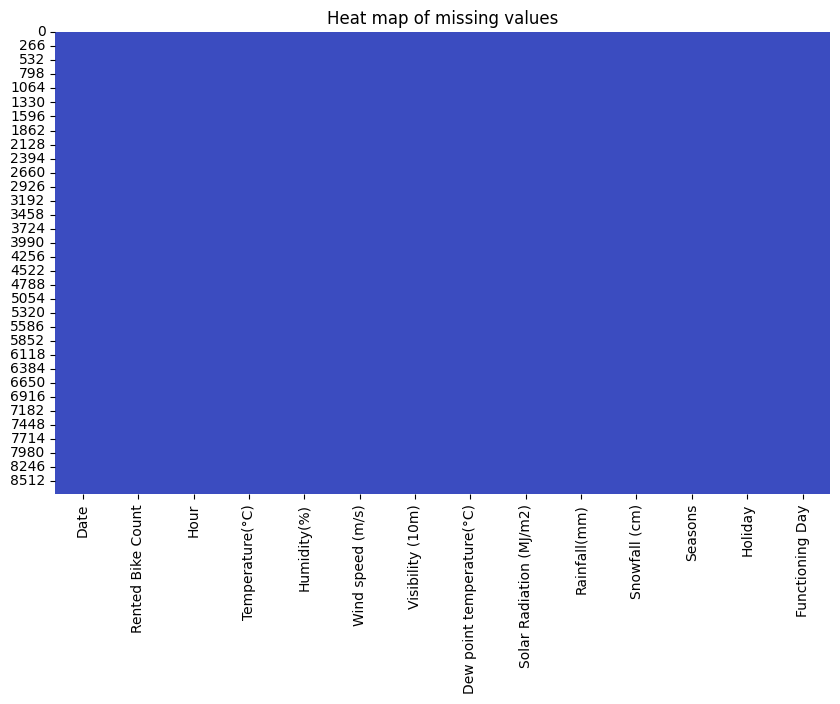

In [ ]:
# Visualizing the missing values

# Creating a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data_set.isnull(),cbar=False,cmap='coolwarm')

# Visualizing data
plt.title("Heat map of missing values")
plt.show()

### What did you know about your dataset?

1. The dataset comprises 8760 rows and 14 columns.

2. There are no null values in the dataset.

3. No duplicate values exist in the dataset.

4. One of the attributes in the dataset, namely Date, has the object data type.

5. Apart from Date, there are three other attributes with object data types in the dataset.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns

column_names = list(data_set.columns)
print("Data set columns")
for i in range(len(column_names)):
  print(f"{i+1}. {column_names[i]}")



Data set columns
1. Date
2. Rented Bike Count
3. Hour
4. Temperature(°C)
5. Humidity(%)
6. Wind speed (m/s)
7. Visibility (10m)
8. Dew point temperature(°C)
9. Solar Radiation (MJ/m2)
10. Rainfall(mm)
11. Snowfall (cm)
12. Seasons
13. Holiday
14. Functioning Day


In [ ]:
# Dataset Describe
data_set.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

### Variables Description

1. **Date:** Represents the date of the recorded data.(Date/Month/Year)

2. **Rented Bike Count:** Indicates the number of bikes rented.

3. **Hour:** Denotes the hour of the day when the data was recorded.

4. **Temperature(°C):** Specifies the temperature in degrees Celsius.

5. **Humidity(%):** Represents the percentage of humidity.

6. **Wind speed (m/s):** Indicates the wind speed in meters per second.

7. **Visibility (10m):** Represents visibility in meters.

8. **Dew point temperature(°C):** Specifies the dew point temperature in degrees Celsius.

9. **Solar Radiation (MJ/m2):** Indicates the solar radiation in MegaJoules per square meter.

10. **Rainfall(mm):** Represents the amount of rainfall in millimeters.

11. **Snowfall (cm):** Indicates the amount of snowfall in centimeters.

12. **Seasons:** Represents the season during which the data was recorded.

13. **Holiday:** Indicates whether the day is a holiday or not.

14. **Functioning Day:** Specifies if the day is a functioning day or not.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

for i in data_set.columns.tolist():
  print(f"Total unique values in {i} : {data_set[i].nunique()}")


Total unique values in Date : 365
Total unique values in Rented Bike Count : 2166
Total unique values in Hour : 24
Total unique values in Temperature(°C) : 546
Total unique values in Humidity(%) : 90
Total unique values in Wind speed (m/s) : 65
Total unique values in Visibility (10m) : 1789
Total unique values in Dew point temperature(°C) : 556
Total unique values in Solar Radiation (MJ/m2) : 345
Total unique values in Rainfall(mm) : 61
Total unique values in Snowfall (cm) : 51
Total unique values in Seasons : 4
Total unique values in Holiday : 2
Total unique values in Functioning Day : 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.


For simplicity, the column names should be changed:

In [ ]:
# For simplicity, the column names should be changed:

# Creating a copy of data set named 'df':
df= data_set.copy()

# Changing the column names:
df.rename({"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew point temperature","Solar Radiation (MJ/m2)":"Solar Radiation","Rainfall(mm)":"Rainfall","Snowfall (cm)":"Snowfall"},axis="columns",inplace=True)

In [ ]:
# Lets see the updated columns

list(df.columns)

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature',
 'Humidity',
 'Wind speed',
 'Visibility',
 'Dew point temperature',
 'Solar Radiation',
 'Rainfall',
 'Snowfall',
 'Seasons',
 'Holiday',
 'Functioning Day']

Changing the data type of "Date" and making separate columns for day, month, and year:

In [ ]:
# Assuming 'Date' is in the format 'YYYY-MM-DD'. If not, adjust the format accordingly.
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Create new columns for day, month, and year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Month'] = df['Month'].apply(lambda x: calendar.month_abbr[x])

# Extracting day name from date
df['Day'] = df['Date'].dt.day_name()

# Extracting year
df['Year'] = df['Date'].dt.year


<ipython-input-16-4548ea0c4d25>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


In [ ]:
# Dropping "Data" column

df.drop(columns=["Date"],inplace=True)

In [ ]:
# lets check

df.head()

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning Day Month       Day  Year  
0  No Holiday             Yes   Jan  Thursday  2017  
1  No Holiday             Yes   Jan  Thursday  2017  
2  No Holiday             Yes   Jan  Thursday  2017  
3  No Holiday             Yes   Jan  Thursday  2017  
4  No Holiday             Yes   Jan  Thursday  2017

### What all manipulations have you done and insights you found?

1. **Column Renaming for Simplicity:**
Certain column names have been changed for simplicity.

2. **Date Column Data Type Change:**
The "Date" column has been converted to the date data type.

3. **Additional Columns - Day, Month, and Year:**
New columns for day, month, and year have been added to the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Relation between Rented bikes and Days(Weekend vs Week days)

In [ ]:
# Chart - 1 visualization code

# Weekend count
weekend=df[df["Day"].isin(['Saturday','Sunday'])].groupby("Day")["Rented Bike Count"].sum().reset_index()
display(weekend)

# Week days count
week_days=df[~df["Day"].isin(['Saturday','Sunday'])].groupby("Day")["Rented Bike Count"].sum().reset_index()
display(week_days)

Day  Rented Bike Count
0  Saturday             911475
1    Sunday             798295

Day  Rented Bike Count
0     Friday             898966
1     Monday             863563
2   Thursday             928267
3    Tuesday             862877
4  Wednesday             908871

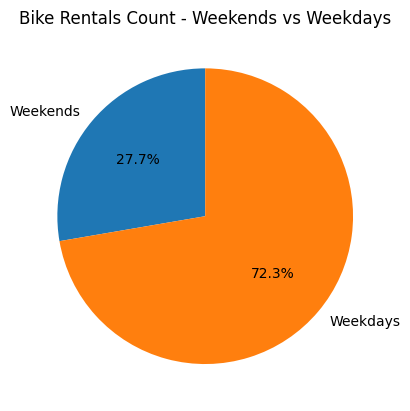

In [ ]:
# Assuming 'Day' column contains the days of the week

# Weekend count
weekend_count=df[df['Day'].isin(['Saturday', 'Sunday'])]['Rented Bike Count'].sum()

# Weekdays count
weekday_count=df[~df['Day'].isin(['Saturday', 'Sunday'])]['Rented Bike Count'].sum()

# Plotting
labels=['Weekends', 'Weekdays']
counts=[weekend_count, weekday_count]

plt.pie(counts,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('Bike Rentals Count - Weekends vs Weekdays')
plt.show()


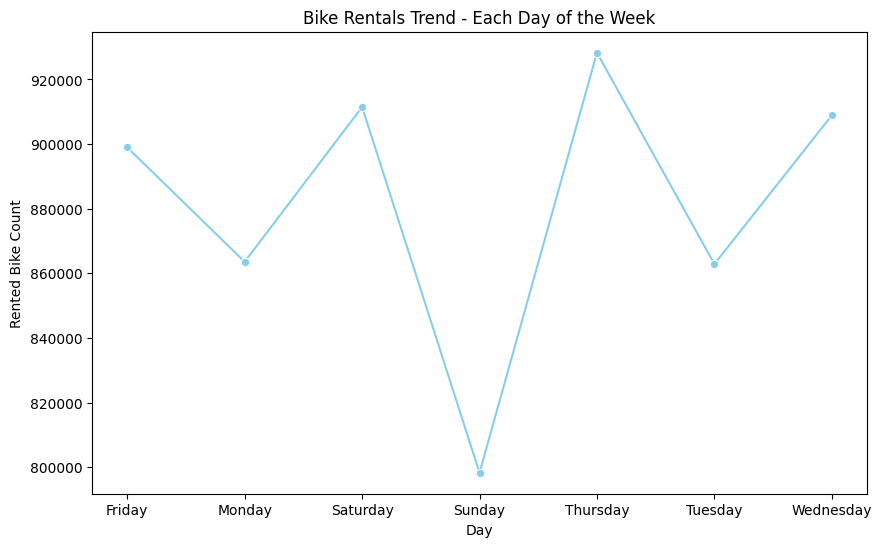

In [ ]:
daily_count= df.groupby("Day")["Rented Bike Count"].sum().reset_index()

# Plotting

plt.figure(figsize=(10,6))
sns.lineplot(x="Day",y="Rented Bike Count",data=daily_count,sort=False,marker="o",color="skyblue")
plt.title("Bike Rentals Trend - Each Day of the Week")
plt.xlabel("Day")
plt.ylabel("Rented Bike Count")
plt.show()

##### 1. Why did you pick the specific chart?

* Pie charts are effective for illustrating the proportion between weekends and weekdays.

* Line charts are effective for showing trends and variations over a continuous variable, such as time or sequential days.



##### 2. What is/are the insight(s) found from the chart?

* The number of bike rentals on weekends is significantly lower than on weekdays.

* Weekends: 27.7% , Weekdays: 72.3%.

* On Thursday, the number of bike rentals is the highest.

* On sunday, the number of bike rentals is the lowest.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Impact:

 Knowing that weekdays contribute significantly more to bike rentals suggests that there might be higher demand during the working days. This insight can guide resource allocation, marketing efforts, and pricing strategies to cater to weekday demand.
Recognizing the highest rentals on Thursday could inform targeted promotions or incentives to boost business on that particular day.

* Potential Negative Impact:

 The lower demand on weekends might lead to underutilized resources during that time. Strategies to attract more weekend customers or promote special weekend events could be considered to address this imbalance.

* Justification:

 While the insight about lower weekend rentals may pose a challenge, it also presents an opportunity for business growth. Implementing targeted promotions or events during weekends could potentially shift the trend and lead to positive growth.

#### Chart - 2 : Rental bike vs Hour(Time period)

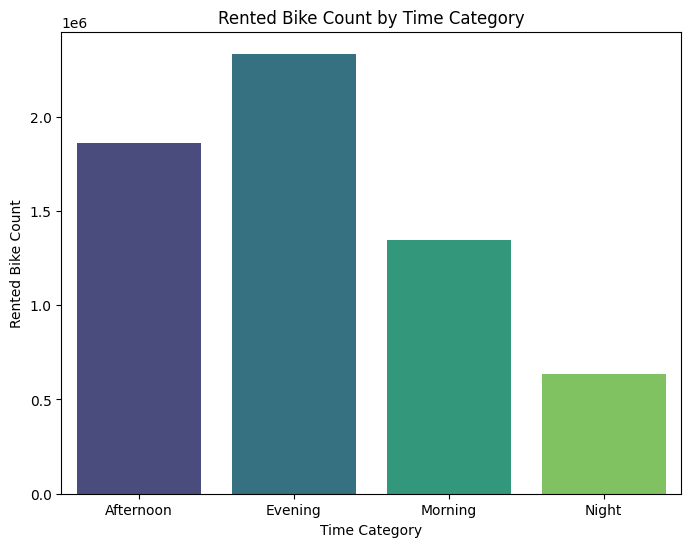

In [ ]:
# Chart - 2 visualization code
hourly_count=df.groupby("Hour")["Rented Bike Count"].sum().reset_index()

# Assuming 'Hour' column contains the hours of the day (0 to 23)

# Function to categorize hours
def categorize_hour(hour):
    if 0<=hour<6:
        return 'Night'
    elif 6<=hour<12:
        return 'Morning'
    elif 12<=hour<18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the categorization function to create a new column 'TimeCategory'
df['TimeCategory']=df['Hour'].apply(categorize_hour)

# Group by time category and calculate the total rented bike count for each category
time_category_counts=df.groupby('TimeCategory')['Rented Bike Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='TimeCategory',y='Rented Bike Count',data=time_category_counts,palette='viridis')
plt.title('Rented Bike Count by Time Category')
plt.xlabel('Time Category')
plt.ylabel('Rented Bike Count')
plt.show()

In [ ]:
display(time_category_counts)

TimeCategory  Rented Bike Count
0    Afternoon            1857788
1      Evening            2333230
2      Morning            1344634
3        Night             636662

##### 1. Why did you pick the specific chart?

* In this scenario, the goal is to compare the rented bike count across different time categories (morning, afternoon, evening, and night). A bar chart provides a clear visual comparison between these categories.

* Time categories, such as morning, afternoon, etc., are discrete and categorical. Each category is distinct, making a bar chart an appropriate choice to represent these non-sequential groups.



##### 2. What is/are the insight(s) found from the chart?

* The highest number of bike rentals occurs in the evening, followed by the afternoon and morning. Bike rentals are lower at night.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* **Positive Business Impact:**

 1. **Evening Peak:** Recognizing the highest bike rentals in the evening suggests a peak demand during that time. The business can capitalize on this insight by optimizing resources, ensuring sufficient bike availability, and potentially introducing targeted promotions to further boost evening rentals.

 2. **Strategic Planning:** Understanding the distribution of rentals across different time categories enables the company to strategically plan operations, allocate resources efficiently, and tailor marketing efforts to peak hours.

* Potential Negative Impact:

 1. **Night Rentals:** The insight that people don't rent bikes much at night could lead to underutilized resources during those hours. While this may limit growth during the night, it also reflects a natural pattern of lower demand during non-peak hours.

 2. **Strategy:**  Introducing promotions during the night when the majority of people are sleeping may not yield significant growth, as there is a natural pattern of lower demand during those hours.


* Overall Justification:

 The gained insights offer an opportunity for positive business impact by aligning operations with peak demand periods. Understanding the reasons behind lower night rentals allows the business to explore strategies to attract customers during those hours, potentially mitigating any negative impact.

#### Chart - 3 : Effect of visibility on rented bike count

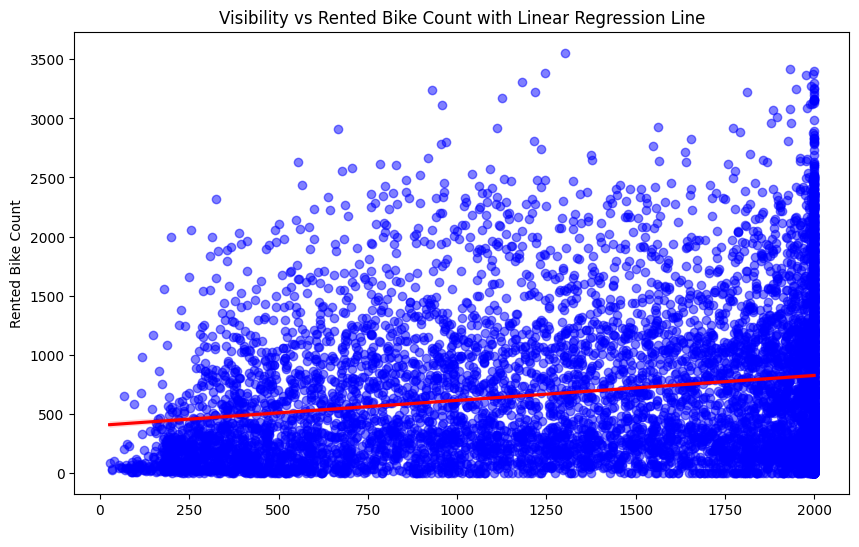

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
sns.regplot(x='Visibility',y='Rented Bike Count',data=df,scatter_kws={'alpha':0.5, 'color':'blue'},line_kws={'color':'red'})
plt.title('Visibility vs Rented Bike Count with Linear Regression Line')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

* The scatter plot with a linear regression line was chosen to visually depict the correlation between visibility and rented bike count. This chart is effective for observing trends, assessing the strength of the relationship, and identifying potential outliers. The linear regression line aids in understanding the direction and magnitude of the association between the two continuous variables.

##### 2. What is/are the insight(s) found from the chart?

* According to the provided data set and the visualization, there is no significant relationship observed between visibility and the number of bike rentals, it suggests that changes in visibility may not be a strong factor influencing variations in bike rental counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

the data shows that visibilty doesn't really affect how many bikes people rent, it means the business can focus on other things to make a positive impact. They can use their time and money on strategies that really matter to customers. But, if they keep investing in visibility without much impact, it might not be the best use of resources. Being flexible and using data insights helps the business make smart decisions for success.

#### Chart - 4 : Number of bike rents during the whole year

In [ ]:
# Avg Number of bike rents in each months
df_month=df.groupby("Month")["Rented Bike Count"].mean().reset_index()
round(df_month,0)

Month  Rented Bike Count
0    Apr              773.0
1    Aug              826.0
2    Dec              419.0
3    Feb              393.0
4    Jan              386.0
5    Jul              929.0
6    Jun              982.0
7    Mar              612.0
8    May              895.0
9    Nov              685.0
10   Oct              843.0
11   Sep              694.0

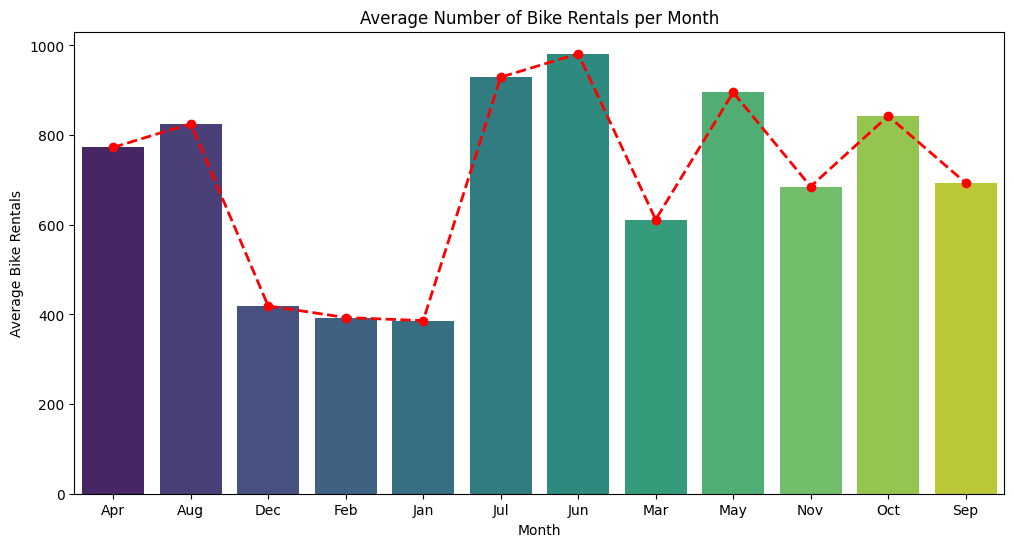

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))

# Line plot
plt.plot(df_month['Month'],df_month['Rented Bike Count'],marker='o',color='red',linestyle='dashed',linewidth=2)

# Bar plot
sns.barplot(x='Month',y='Rented Bike Count',data=df_month,palette='viridis')
plt.title('Average Number of Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.show()

##### 1. Why did you pick the specific chart?

* Comparison of Monthly Averages: A bar plot is chosen to compare the average number of bike rentals for each month effectively.

* Categorical Representation: Months are represented on the x-axis, a categorical variable, making a bar plot suitable for this type of data.

* Visual Clarity: Bar plots are visually intuitive, providing a clear comparison of values between different months.

* Line for Trend: The addition of a line plot helps visualize trends or patterns in the average bike rentals across months.

* Ease of Interpretation: The combination of bar and line plots makes it easy for viewers to interpret both individual monthly values and overall trends.

* Palette Choice: The 'viridis' color palette is chosen for better visibility and aesthetic appeal.

##### 2. What is/are the insight(s) found from the chart?

* Peak Months: June (982.0), July (929.0), and August (826.0) are the peak months with the highest average bike rentals. This suggests a seasonal pattern where warmer months experience increased bike rental demand.

* Seasonal Fluctuations: The data indicates seasonal fluctuations, with higher rentals during spring and summer months (April to August) and lower rentals during colder months (December to February).

* Lower Demand in Winter: December (419.0) and January (386.0) show lower average rentals, which aligns with the typical trend of reduced outdoor activities and bike usage during colder winter months.

* Consistency in Autumn: October (843.0) and November (685.0) still exhibit relatively high average bike rentals, suggesting a level of consistency in demand during the autumn months.

* Potential Promotional Opportunities: For the winter months with lower rentals, there may be opportunities for targeted promotions or marketing strategies to boost bike rentals during these periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

 1. Optimized Resource Allocation: The insights into peak months (June to August) allow the business to optimize resources, ensuring sufficient bike availability and staffing during high-demand periods. This can lead to increased customer satisfaction and potential revenue growth.

 2. Strategic Marketing: Understanding seasonal fluctuations enables the business to strategically plan marketing campaigns. For example, focusing promotions on warmer months when demand is naturally higher can attract more customers.

 3. Promotional Opportunities: Recognizing lower demand in winter months presents opportunities for targeted promotions or incentives to encourage bike rentals during traditionally slower periods.

* Potential Negative Impact:

 1. Winter Challenges: The lower demand in winter months may pose challenges, such as potential revenue reduction and excess inventory. However, this is a natural pattern, and the business can plan accordingly to mitigate negative impacts.

 2. Weather Dependency: Bike rentals are weather-dependent, and adverse weather conditions during peak months might impact operations. However, this risk is inherent in the bike rental industry and can be managed through flexible strategies.

Overall Justification:

The gained insights provide a foundation for positive business impact by aligning operations with seasonal demand patterns. Strategic planning, targeted promotions, and resource optimization during peak months can lead to overall growth. While challenges exist during slower periods, proactive measures can mitigate potential negative impacts.

#### Chart - 5 : Business growth over the years

In [ ]:
# Chart - 5 visualization code

# Lets see the How many years are there in the data set
df["Year"].unique()

array([2017, 2018])

In [ ]:
# Total number of bike rental in 2017 and 2018
year_pattern=df.groupby("Year")["Rented Bike Count"].sum().reset_index()
year_pattern

Year  Rented Bike Count
0  2017             185330
1  2018            5986984

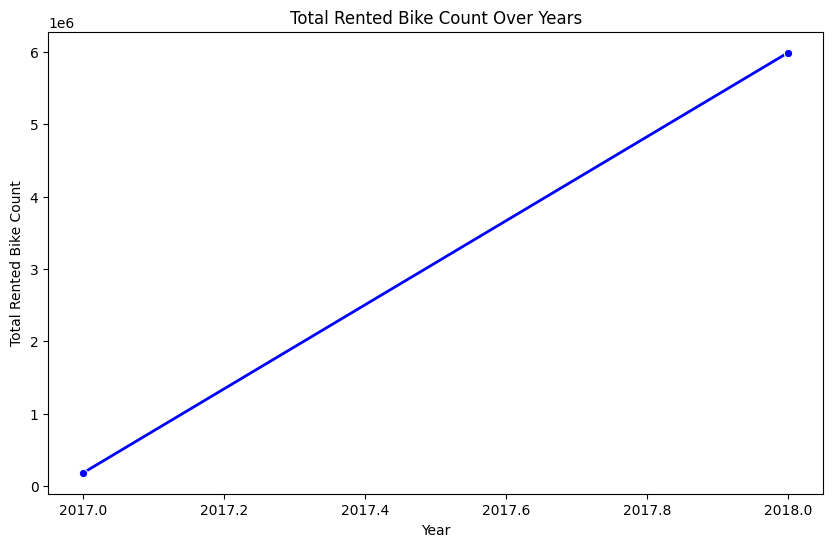

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year',y='Rented Bike Count',data=year_pattern,marker='o',color='blue',linestyle='-',linewidth=2)
plt.title('Total Rented Bike Count Over Years')
plt.xlabel('Year')
plt.ylabel('Total Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

* A line plot was chosen to visually represent the trend in the total rented bike count over the years. This chart is effective for showcasing yearly changes, emphasizing continuity, and providing a clear overview of the business's performance evolution.

##### 2. What is/are the insight(s) found from the chart?

* Yearly Growth: The business experienced substantial growth from 2017 to 2018, with a significant increase in the total rented bike count.

* Dominant Trends: The continuous upward trajectory suggests a positive and consistent trend in bike rentals, indicating potential popularity and demand for the service.

* Business Expansion: The overall rising trend signifies the success and expansion of the bike rental service, reflecting positively on the business's market presence and customer engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

1. Informed Decision-Making:

  Optimizing Resources: Insights into yearly growth allow for informed resource optimization, ensuring the business is prepared to meet increasing demand.

2. Strategic Planning:

 Expanding Services: Understanding dominant trends and periods of accelerated growth provides an opportunity for strategic planning, such as expanding services or entering new markets.

3. Marketing Effectiveness:

 Enhanced Marketing Strategies: Identification of strategic milestones enables the evaluation of marketing effectiveness during periods of significant growth, allowing for the refinement of successful strategies.

* Potential Negative Impact:

1. Sustainability Challenges:

 Maintaining Growth: Sustaining the high growth observed in 2018 might pose challenges. Failure to maintain or exceed this growth rate could be perceived as negative, impacting investor confidence or market perception.

2. Market Saturation:

 Market Dynamics: If the growth is primarily due to a newly entered market or unique service offering, saturation or increased competition in that market may lead to slower growth rates in subsequent years.

#### Chart - 6 : Seasonal effect on bike rental

In [ ]:
# Chart - 6 visualization code

df_season=df.groupby("Seasons")["Rented Bike Count"].mean().reset_index()
round(df_season)

Seasons  Rented Bike Count
0  Autumn              820.0
1  Spring              730.0
2  Summer             1034.0
3  Winter              226.0

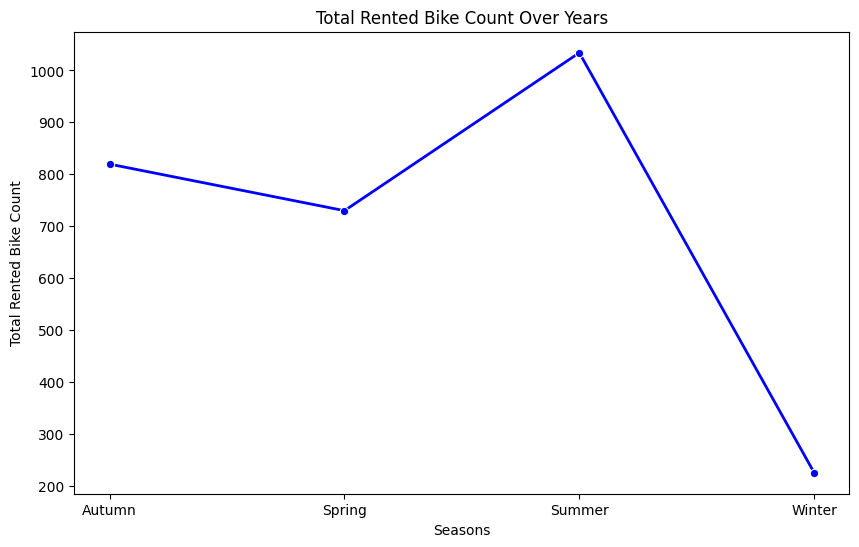

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='Seasons',y='Rented Bike Count',data=df_season,marker='o',color='blue',linestyle='-',linewidth=2)
plt.title('Total Rented Bike Count Over Years')
plt.xlabel('Seasons')
plt.ylabel('Total Rented Bike Count')
plt.show()

  Seasons  Rented Bike Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169


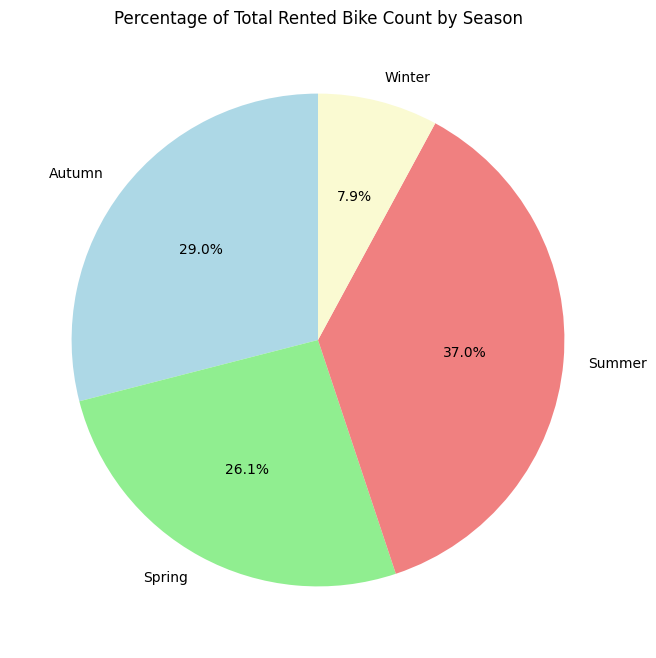

In [ ]:
# Create a DataFrame with total rented bike counts for each season
seasonly_totals=df.groupby('Seasons')['Rented Bike Count'].sum().reset_index()
print(seasonly_totals)
# Plotting
plt.figure(figsize=(8, 8))
plt.pie(seasonly_totals['Rented Bike Count'],labels=seasonly_totals['Seasons'],autopct='%1.1f%%',startangle=90,colors=['lightblue','lightgreen','lightcoral','lightgoldenrodyellow'])
plt.title('Percentage of Total Rented Bike Count by Season')
plt.show()

##### 1. Why did you pick the specific chart?

* Pie Chart:

 Effective for Proportions: Pie charts are chosen when illustrating the proportion of different categories within a whole, suitable for showcasing the distribution of rented bike counts across seasons.

* Line Chart:

 Temporal Trends: Line charts are selected for visualizing temporal trends, making them ideal for displaying how rented bike counts have evolved over the years, providing a clear overview of the business's performance.

##### 2. What is/are the insight(s) found from the chart?

* Seasonal Dominance:

 Summer: Summer stands out as the dominant season, contributing the highest percentage to the total rented bike counts. This aligns with the expectation of increased outdoor activities during warmer months.

* Seasonal Variability:

 Autumn & Spring: Autumn and Spring show substantial rented bike counts, indicating a consistent demand for bike rentals during transitional seasons.

* Winter Impact:

 Winter: Winter exhibits a lower rented bike count, which is expected due to colder weather conditions affecting outdoor activities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Positive Business Impact:

1. Strategic Resource Allocation:

 Optimizing Summer Services: The dominance of Summer suggests focusing marketing efforts and service enhancements during this high-demand season, potentially leading to increased revenue.

2. Adaptation for Transitional Seasons:

 Consistent Autumn and Spring: Recognizing consistent demand in Autumn and Spring allows the business to maintain adequate resources and services during these transitional seasons, ensuring customer satisfaction.

* Potential Negative Impact:

1. Winter Challenges:

 Reduced Demand in Winter: The lower rented bike count during Winter may pose challenges such as excess inventory and potential revenue reduction. Winter conditions may limit outdoor activities, affecting the overall demand.

#### Chart - 7 : Effect of temperature on Bike rentals

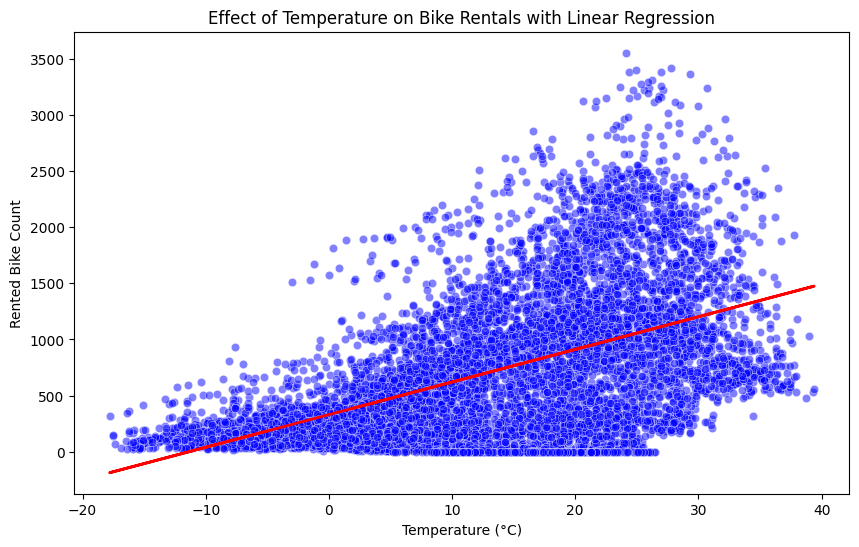

In [ ]:
# Assuming 'Temperature(°C)' and 'Rented Bike Count' columns in your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(x='Temperature',y='Rented Bike Count',data=df,color='blue',alpha=0.5)

# Linear regression line
regression_model=LinearRegression()
X=df[['Temperature']]
y=df['Rented Bike Count']
regression_model.fit(X, y)

# Predicted values
y_pred=regression_model.predict(X)

# Plotting the linear regression line
plt.plot(X,y_pred,color='red',linewidth=2)

plt.title('Effect of Temperature on Bike Rentals with Linear Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.show()


##### 1. Why did you pick the specific chart?

* Visualizing Trends: A scatter plot allows for the visual examination of individual data points, providing insights into the distribution and patterns in the dataset.

* Linear Regression Line: Adding a linear regression line helps quantify and visualize the overall trend or relationship between temperature and bike rentals. It provides a clear representation of the direction and strength of the correlation.

* Interpretability: The combination of scatter plot and linear regression line is easy to interpret. It allows for a quick assessment of whether there's a linear relationship and the degree of correlation.

##### 2. What is/are the insight(s) found from the chart?

* There is a positive correlation between temperature and bike rentals, indicating that as the temperature rises, the demand for bike rentals tends to increase.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Positive Business Impact:

 **1. Strategic Planning:**
  Optimized Resource Allocation: The insight that bike rentals increase with higher temperatures allows for strategic planning. Businesses can allocate resources more efficiently during peak demand, ensuring a well-prepared inventory and staff.

* Potential Negative Impact:

 **2. Weather Dependency:**
 Seasonal Vulnerability: Heavy reliance on temperature as a primary driver for bike rentals could lead to vulnerability during adverse weather conditions. Unfavorable weather might result in decreased demand, potentially impacting revenue.  

#### Chart - 8 : Relation between Bike rental with Holiday and Functioning Day

In [ ]:
df["Holiday"].unique()

array(['No Holiday', 'Holiday'], dtype=object)

      Holiday  Rented Bike Count
0     Holiday         499.756944
1  No Holiday         715.228026


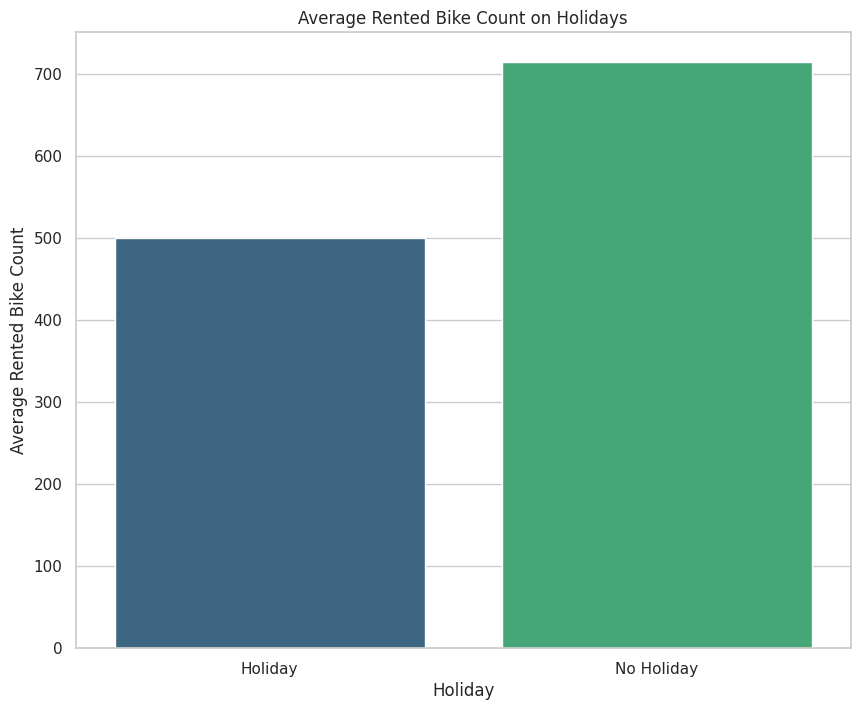

In [ ]:
df_holiday_avg=df.groupby("Holiday")["Rented Bike Count"].mean().reset_index()
print(df_holiday_avg)
# Visualization

plt.figure(figsize=(10,8))
sns.barplot(x="Holiday",y="Rented Bike Count",data= df_holiday_avg,palette='viridis')
plt.title("Average Rented Bike Count on Holidays")
plt.xlabel('Holiday')
plt.ylabel('Average Rented Bike Count')
plt.show()

1. Why did you pick the specific chart?

 * Comparison of Averages:
   Bar plots are effective for comparing the average values of a variable across different categories. In this case, we are comparing the average rented bike count on holidays and non-holidays.

2. What is/are the insight(s) found from the chart?

* Holiday Average Rented Bike Count:
On holidays, the average rented bike count is approximately 499.76.

* Non-Holiday Average Rented Bike Count:
On non-holidays, the average rented bike count is higher, at approximately 715.23.

* Average demand of bike on No holiday is higher than the demand on holiday.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Positive Business Impact:
The gained insights can potentially lead to a positive business impact. The understanding that the average rented bike count is higher on non-holidays than on holidays allows the bike rental company to make informed decisions regarding resource allocation, marketing strategies, and promotions. The company can focus on optimizing its services, increasing promotional efforts, and offering special deals during non-holiday periods to capitalize on higher demand.

* Insights Leading to Negative Growth:
While the data indicates a difference in average bike rentals between holidays and non-holidays, it's essential to consider the context and the broader business strategy. The lower average rented bike count on holidays may present an opportunity for targeted promotions or events to increase demand during those specific periods. Therefore, the insight itself does not necessarily lead to negative growth, but it highlights areas where the company can strategize to balance and maximize demand throughout the year.


In [ ]:
df["Functioning Day"].unique()

array(['Yes', 'No'], dtype=object)

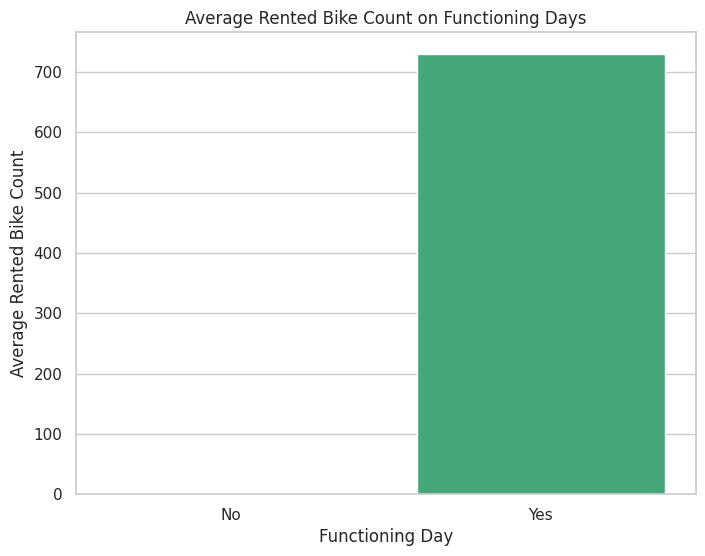

In [ ]:
# Group by Functioning Day and calculate the average rented bike count
average_rentals_by_functioning_day=df.groupby('Functioning Day')['Rented Bike Count'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8,6))
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=average_rentals_by_functioning_day,palette='viridis')
plt.title('Average Rented Bike Count on Functioning Days')
plt.xlabel('Functioning Day')
plt.ylabel('Average Rented Bike Count')
plt.show()

In [ ]:
df.groupby('Functioning Day')['Rented Bike Count'].sum().reset_index()


Functioning Day  Rented Bike Count
0              No                  0
1             Yes            6172314

#### Chart - 9 : Effect of rainfall and snow fall on rental bike demand

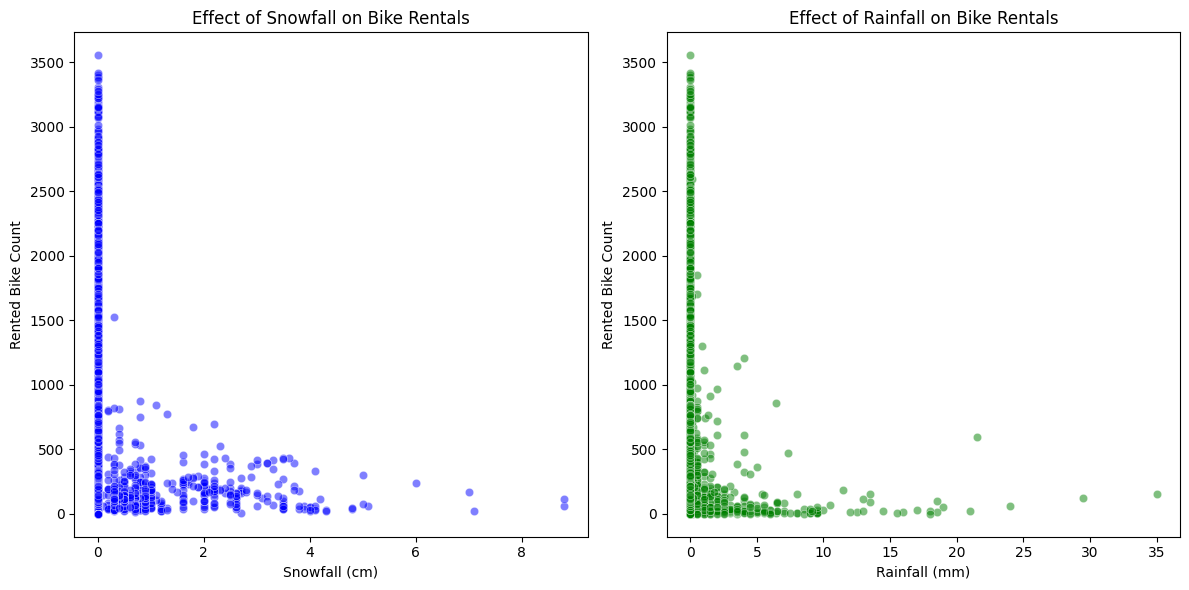

In [ ]:
# Chart - 8 visualization code

# Assuming 'Snowfall (cm)', 'Rainfall(mm)', and 'Rented Bike Count' columns in your DataFrame
plt.figure(figsize=(12,6))

# Scatter plot for Snowfall
plt.subplot(1,2,1)
sns.scatterplot(x='Snowfall',y='Rented Bike Count',data=df,color='blue',alpha=0.5)
plt.title('Effect of Snowfall on Bike Rentals')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')

# Scatter plot for Rainfall
plt.subplot(1,2,2)
sns.scatterplot(x='Rainfall',y='Rented Bike Count',data=df,color='green',alpha=0.5)
plt.title('Effect of Rainfall on Bike Rentals')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented Bike Count')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Scatter Plots:

 Visual Inspection: Scatter plots allow for a visual inspection of individual data points, helping to observe patterns, trends, and potential outliers. They are effective for understanding the overall distribution and correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

* The scatter plots reveal a negative correlation between bike rentals and both snowfall and rainfall. As these weather conditions increase, bike demand tends to decrease.

* Bike demand decreases with the increase of snowfall and rainfall is crucial for understanding the impact of weather conditions on bike rentals. Additionally, identifying specific thresholds, such as a decrease in demand after snowfall exceeds 4 cm and rainfall exceeds 10 mm.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Positive Business Impact:

1. Operational Efficiency:

 Resource Optimization: Understanding the negative correlation between bike demand and adverse weather conditions allows businesses to optimize resources during such periods. This can lead to more efficient operations and cost savings.

* Negative Growth Considerations:

2. Weather-Dependent Revenue:

 Revenue Vulnerability: Relying heavily on bike rentals as a primary source of revenue during adverse weather conditions poses a risk. If the business is not diversified, negative growth may occur during extended periods of inclement weather.

#### Chart - 10 : Histogram for 'Rented Bike Count'

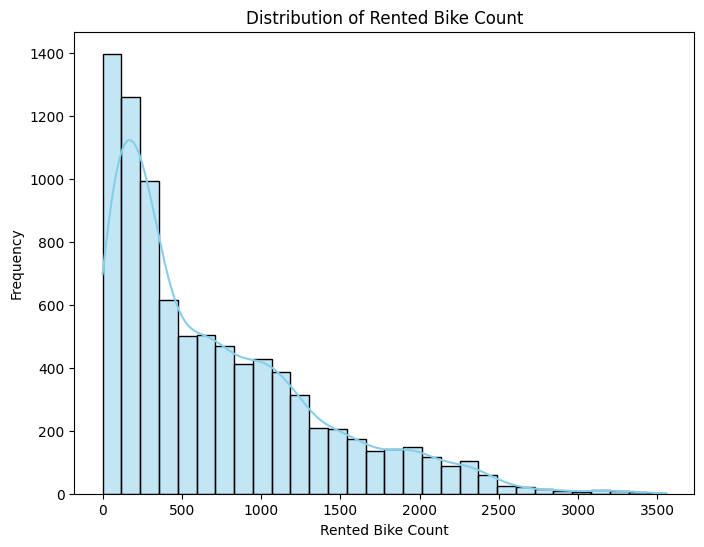

In [ ]:
# Histogram for 'Rented Bike Count'
plt.figure(figsize=(8, 6))
sns.histplot(data_set['Rented Bike Count'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

* Distribution Visualization:

 Histograms are excellent for visualizing the distribution of a numerical variable. They provide insights into the frequency and pattern of values within a specific range.

* Central Tendency and Spread:

 Histograms show the central tendency (e.g., mean or median) and spread of the data. This is crucial for understanding where most values are concentrated and how dispersed they are.

* Identification of Patterns:

 Patterns such as symmetry, skewness, or multimodality are easily identified in histograms. These patterns can reveal underlying characteristics of the variable's distribution.

* Outlier Detection:

 Outliers, which are values significantly different from the rest of the data, can be spotted in histograms. This aids in identifying any unusual or extreme values in the 'Rented Bike Count.'

* Easy Interpretation:

 Histograms provide a straightforward and intuitive way to interpret the distribution of a variable. Viewers can quickly grasp the shape and characteristics of the data.

##### 2. What is/are the insight(s) found from the chart?

* The majority of rented bike counts are between 0 to 500, with the frequency quickly decreasing as the count increases.

* There is a significant drop in frequency as the rented bike count exceeds 1000.

* The distribution of the rented bike count is right-skewed, indicating that there are more instances of lower counts and fewer instances of higher counts.Answer Here

#### Chart - 11 : Box plot of all Features of nature

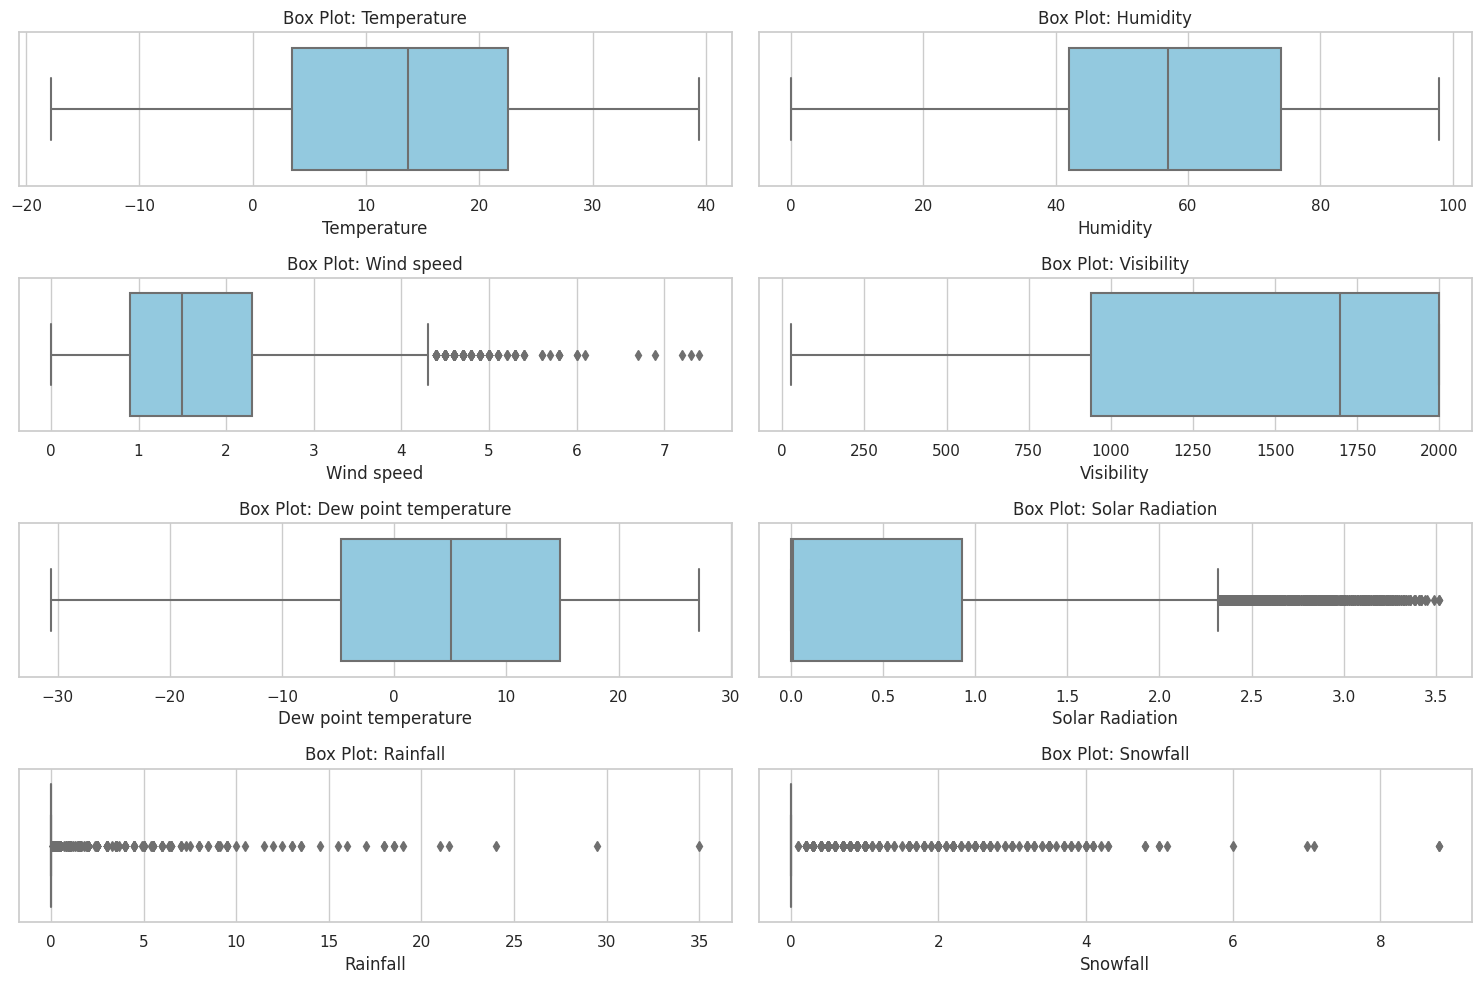

In [ ]:
# Subset of the dataset containing the specified variables
selected_variables = ['Temperature','Humidity','Wind speed','Visibility',
                       'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall']

# Create box plots for each variable
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

for i, variable in enumerate(selected_variables, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[variable], color='skyblue')
    plt.title(f'Box Plot: {variable}')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

* Visualizing Distribution:

 Box plots are effective in visualizing the distribution of numerical variables. They provide a clear representation of the central tendency, spread, and potential outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

* Temperature: The box plot shows a fairly symmetrical distribution of data with no outliers, indicating that the temperature data follows a normal distribution.

* Humidity: The data is also fairly symmetrical but has a slight positive skewness, suggesting that there are more instances of high humidity.

* Wind Speed: The box plot shows positive skewness with multiple outliers, indicating occasional high wind speeds.

* Visibility: This box plot displays a symmetrical distribution similar to that of temperature and humidity, suggesting that visibility data is normally distributed.

* Dew Point Temperature: The data is fairly symmetrical, showing a normal distribution.

* Solar Radiation: The box plot indicates positive skewness with an outlier, suggesting occasional high radiation levels.

* Rainfall and Snowfall: Both these box plots show positive skewness with multiple outliers, indicating occasional heavy precipitation events.

#### Chart - 12 - Correlation Heatmap

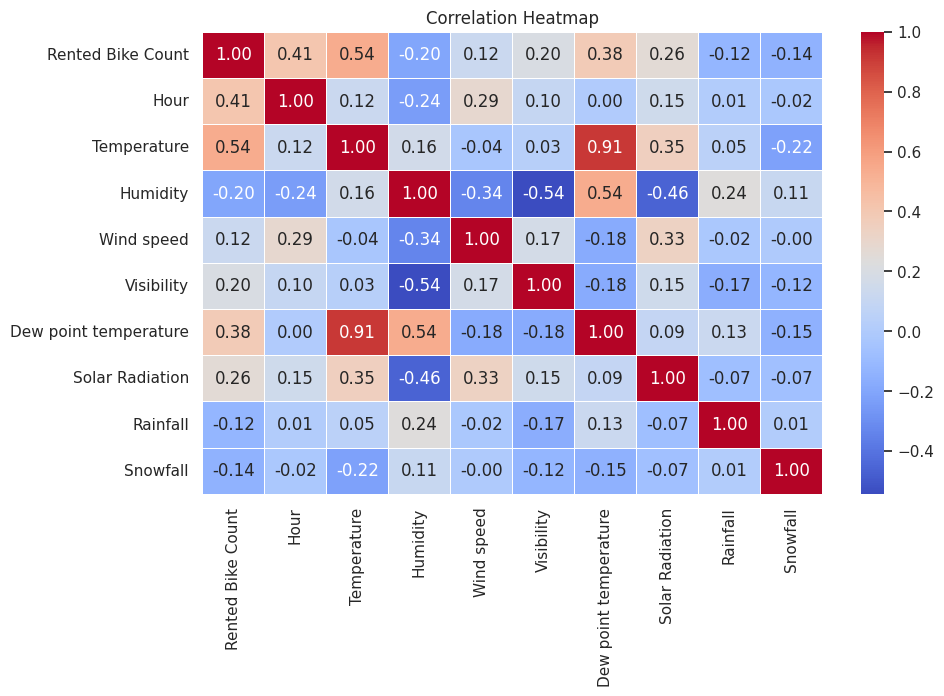

In [ ]:
# Correlation Heatmap visualization code
selected_col=["Rented Bike Count","Hour","Temperature","Humidity","Wind speed","Visibility","Dew point temperature","Solar Radiation","Rainfall","Snowfall"]
corr_matrix=df[selected_col].corr()

# Create a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt=".2f",linewidths=.5)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
corr_matrix.T

Rented Bike Count      Hour  Temperature  Humidity  \
Rented Bike Count               1.000000  0.410257     0.538558 -0.199780   
Hour                            0.410257  1.000000     0.124114 -0.241644   
Temperature                     0.538558  0.124114     1.000000  0.159371   
Humidity                       -0.199780 -0.241644     0.159371  1.000000   
Wind speed                      0.121108  0.285197    -0.036252 -0.336683   
Visibility                      0.199280  0.098753     0.034794 -0.543090   
Dew point temperature           0.379788  0.003054     0.912798  0.536894   
Solar Radiation                 0.261837  0.145131     0.353505 -0.461919   
Rainfall                       -0.123074  0.008715     0.050282  0.236397   
Snowfall                       -0.141804 -0.021516    -0.218405  0.108183   

                       Wind speed  Visibility  Dew point temperature  \
Rented Bike Count        0.121108    0.199280               0.379788   
Hour                     0.285197    0.098753               0.003054   
Temperature             -0.036252    0.034794               0.912798   
Humidity                -0.336683   -0.543090               0.536894   
Wind speed               1.000000    0.171507              -0.176486   
Visibility               0.171507    1.000000              -0.176630   
Dew point temperature   -0.176486   -0.176630               1.000000   
Solar Radiation          0.332274    0.149738               0.094381   
Rainfall                -0.019674   -0.167629               0.125597   
Snowfall                -0.003554   -0.121695              -0.150887   

                       Solar Radiation  Rainfall  Snowfall  
Rented Bike Count             0.261837 -0.123074 -0.141804  
Hour                          0.145131  0.008715 -0.021516  
Temperature                   0.353505  0.050282 -0.218405  
Humidity                     -0.461919  0.236397  0.108183  
Wind speed                    0.332274 -0.019674 -0.003554  
Visibility                    0.149738 -0.167629 -0.121695  
Dew point temperature         0.094381  0.125597 -0.150887  
Solar Radiation               1.000000 -0.074290 -0.072301  
Rainfall                     -0.074290  1.000000  0.008500  
Snowfall                     -0.072301  0.008500  1.000000

##### 1. Why did you pick the specific chart?

* A correlation heatmap allows for a comprehensive visual summary of the pairwise correlations between multiple variables. It provides a quick and intuitive overview of the strength and direction of relationships.

##### 2. What is/are the insight(s) found from the chart?

* **Rented Bike Count and Temperature:**

 There is a moderately strong positive correlation (0.54) between the number of rented bikes and temperature. This indicates that bike rentals tend to increase with higher temperatures.

* **Rented Bike Count and Hour:**

 There is a moderate positive correlation (0.41) between the number of rented bikes and the hour of the day. This suggests that certain hours may see higher demand for bike rentals.

* **Rented Bike Count and Humidity:**

 There is a negative correlation (-0.20) between bike rentals and humidity. This implies that as humidity increases, bike rentals may decrease.

* **Rented Bike Count and Solar Radiation:**

 There is a positive correlation (0.26) between bike rentals and solar radiation. Higher solar radiation may contribute to increased bike rentals.

* **Humidity and Visibility:**

 There is a strong negative correlation (-0.54) between humidity and visibility. As humidity increases, visibility tends to decrease.

* **Temperature and Dew Point Temperature:**

 There is a very strong positive correlation (0.91) between temperature and dew point temperature. This is expected, as dew point temperature is influenced by the air's moisture content.

* **Temperature and Solar Radiation:**

 There is a positive correlation (0.35) between temperature and solar radiation. Warmer temperatures may contribute to higher solar radiation.

* **Humidity and Dew Point Temperature:**

 There is a positive correlation (0.54) between humidity and dew point temperature. This is consistent with the relationship between air humidity and dew point.



#### Chart - 13 - Pair Plot

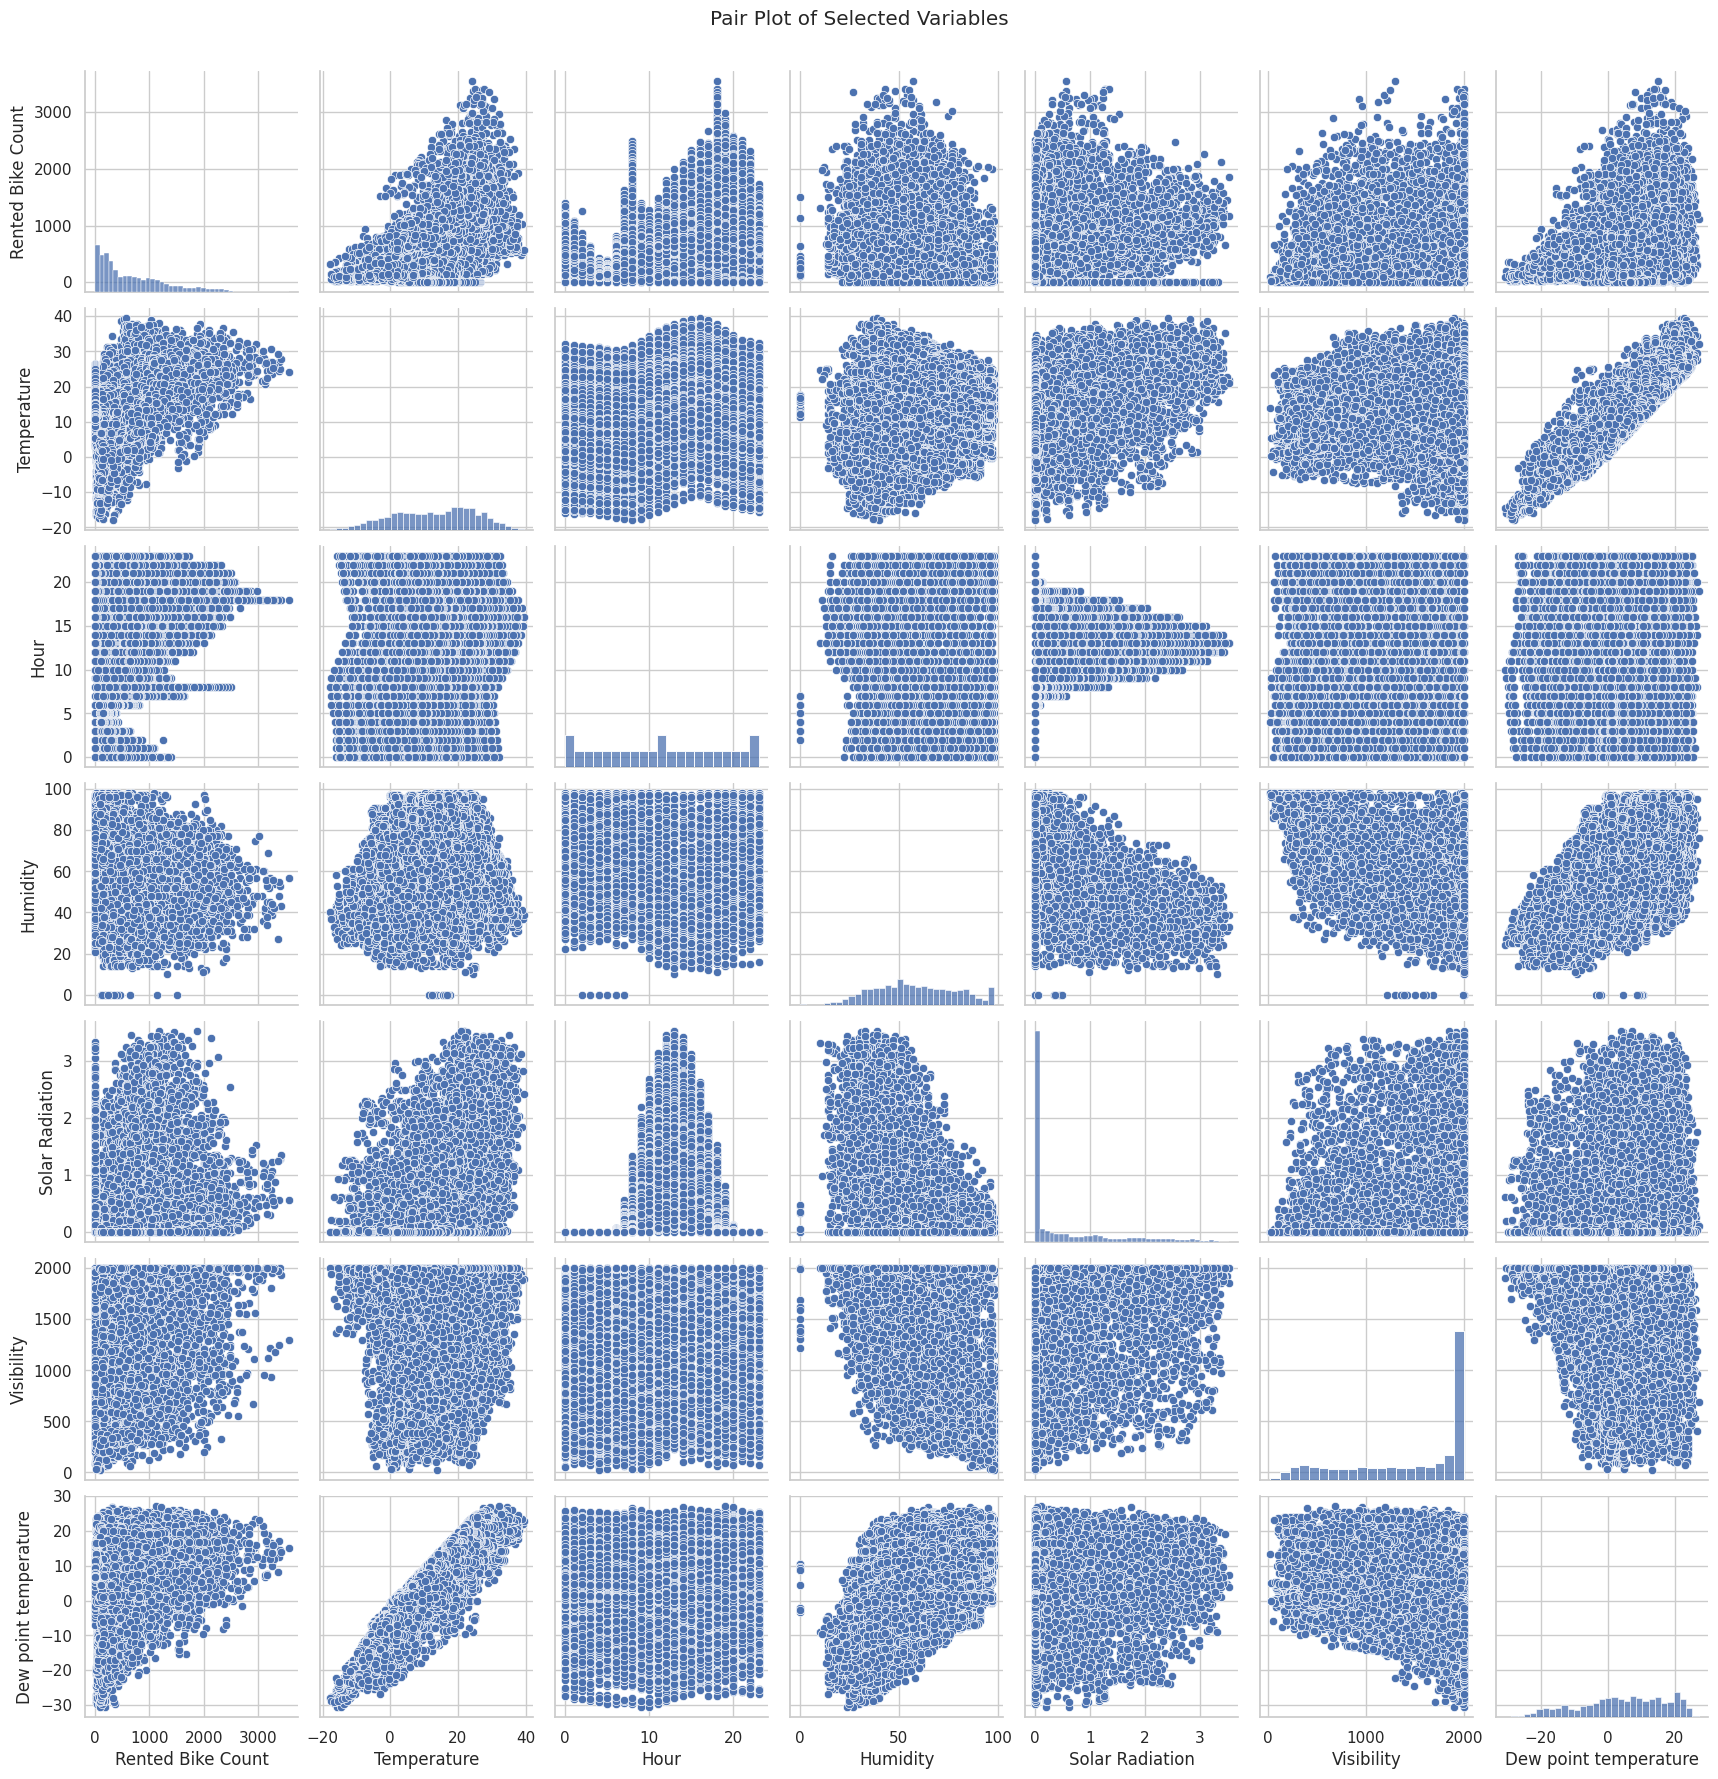

In [ ]:
# Select the variables for the pair plot
selected_variables = ["Rented Bike Count","Temperature","Hour","Humidity","Solar Radiation","Visibility","Dew point temperature"]

# Create a pair plot
sns.pairplot(df[selected_variables])
plt.suptitle("Pair Plot of Selected Variables",y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

* Multivariate Visualization:

 A Pair Plot is a powerful tool for multivariate visualization, allowing you to explore the relationships between multiple variables in a single chart.

* Scatter Plots and Diagonal Histograms:

 The Pair Plot displays scatter plots for each pair of variables, providing insights into the correlation and distribution of data points. The diagonal of the plot shows histograms for individual variables, giving a univariate summary.

##### 2. What is/are the insight(s) found from the chart?

* Positive Correlation:

 "Rented Bike Count" has a positive correlation with both "Temperature(°C)" and "Dew point temperature(°C)." This suggests that as the temperature and dew point temperature increase, the number of rented bikes also tends to increase.

* Solar Radiation:

 "Rented Bike Count" has a light correlation with "Solar Radiation (MJ/m2)." This implies that solar radiation has some influence on the bike rental count, but the correlation is not as strong as with temperature and dew point temperature.

* Temperature and Dew Point Temperature:

 "Temperature(°C)" and "Dew point temperature(°C)" have a significant positive correlation. This is expected as these two variables are often related, with dew point temperature influenced by the moisture content in the air.

* Humidity and Dew Point Temperature:

 Humidity(%) has a significant positive correlation with "Dew point temperature(°C)."

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is a relationship between temperature and the number of rented bikes.

2. There is a relationship between Temperature and Dew Point Temperature.

3. There is a relationship between season and the number of rented bikes.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0):
There is a relationship between temperature and the number of rented bikes.

* Alternative Hypothesis (H1):
There is no relationship between temperature and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Example data (replace with your actual data)
temperature=df['Temperature']
rented_bikes=df['Rented Bike Count']

# Calculate correlation coefficient and p-value
corr_coeff,p_value=pearsonr(temperature,rented_bikes)

# Print results
print(f'Correlation Coefficient:{round(corr_coeff,2)}')
print(f'P-value:{p_value}')

# Interpret the results based on the significance level (e.g., 0.05)
if p_value < 0.05:
    print('Fail to reject the null hypothesis. There is a relationship between temperature and the number of rented bikes.')
else:
    print('Reject the null hypothesis. There is no significant relationship.')


Correlation Coefficient:0.54
P-value:0.0
Fail to reject the null hypothesis. There is a relationship between temperature and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: Pearson correlation coefficient (pearsonr from scipy.stats)

##### Why did you choose the specific statistical test?

Pearson correlation is used to measure the strength and direction of a linear relationship between two continuous variables. In this case, we want to assess if there is a linear relationship between temperature and the number of rented bikes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0):

 There is a relationship between Temperature and Dew Point Temperature.

* Alternative Hypothesis (H1):

 There is no relationship between Temperature and Dew Point Temperature.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Example data (replace with your actual data)
temperature=df['Temperature']
dew_point_temperature=df['Dew point temperature']

# Calculate correlation coefficient and p-value
corr_coeff,p_value=pearsonr(temperature,dew_point_temperature)

# Print results
print(f'Correlation Coefficient:{round(corr_coeff,2)}')
print(f'P-value:{p_value}')

# Interpret the results based on the significance level
if p_value<0.05:
    print('Fail to reject the null hypothesis. There is a relationship between Temperature and Dew Point Temperature.')
else:
    print('Reject the null hypothesis. There is no significant relationship.')


Correlation Coefficient:0.91
P-value:0.0
Fail to reject the null hypothesis. There is a relationship between Temperature and Dew Point Temperature.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: Pearson correlation coefficient (pearsonr from scipy.stats)

##### Why did you choose the specific statistical test?

Similar to the first hypothesis, Pearson correlation is suitable for assessing the linear relationship between two continuous variables. Here, we're examining the relationship between Temperature and Dew Point Temperature.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis (H0):

 There is a relationship between season and the number of rented bikes.

* Alternative Hypothesis (H1):

 There is no relationship between season and the number of rented bikes.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Example data (replace with your actual data)
seasons=df['Seasons']
rented_bikes=df['Rented Bike Count']

# Perform one-way ANOVA test
f_statistic,p_value=f_oneway(*[rented_bikes[seasons==season] for season in df['Seasons'].unique()])

# Print results
print(f'F-statistic:{round(f_statistic,2)}')
print(f'P-value:{p_value}')

# Interpret the results based on the significance level
if p_value<0.05:
    print('Fail to reject the null hypothesis. There is a relationship between season and the number of rented bikes.')
else:
    print('Reject the null hypothesis. There is no significant relationship.')

F-statistic:776.47
P-value:0.0
Fail to reject the null hypothesis. There is a relationship between season and the number of rented bikes.


##### Which statistical test have you done to obtain P-Value?

Statistical Test: One-way ANOVA test (f_oneway from scipy.stats)

##### Why did you choose the specific statistical test?

One-way ANOVA is used when comparing the means of three or more groups. In this hypothesis, we want to determine if there is a significant difference in the mean number of rented bikes among different seasons. ANOVA allows us to test this across multiple groups.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

# We've seen before that there is no single missing value in the data set but let's check again
display(df.isnull().sum())


Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Month                    0
Day                      0
Year                     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Since, there is no missing values in the data set, there is no need for imputation.

### 2. Handling Outliers

In [ ]:
# Specify the numeric columns for which you want to handle outliers
numeric_columns_of_interest = ['Hour','Temperature','Humidity','Wind speed','Visibility','Dew point temperature','Solar Radiation','Rainfall','Snowfall']

# Create a dictionary to store the count of outliers for each column
outlier_counts={}

# Loop through each numeric column
for column in numeric_columns_of_interest:
    # Calculate Q1 and Q3
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)

    # Calculate IQR
    IQR=Q3-Q1

    # Define the upper and lower bounds for outliers
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR

    # Identify outliers
    outliers=df[(df[column]<lower_bound)|(df[column]>upper_bound)]
    # Handle outliners
    df_outliner=df[~((df[column]<lower_bound)|(df[column]>upper_bound))]

    # Count and store the number of outliers
    outlier_count=outliers.shape[0]
    outlier_counts[column]=outlier_count


    # Print or visualize the count of outliers
    print(f"Number of outliers in {column}: {outlier_count}")

# Display the overall count of outliers for each column
print("\nOverall Count of Outliers:")
print(outlier_counts)


Number of outliers in Hour: 0
Number of outliers in Temperature: 0
Number of outliers in Humidity: 0
Number of outliers in Wind speed: 161
Number of outliers in Visibility: 0
Number of outliers in Dew point temperature: 0
Number of outliers in Solar Radiation: 641
Number of outliers in Rainfall: 528
Number of outliers in Snowfall: 443

Overall Count of Outliers:
{'Hour': 0, 'Temperature': 0, 'Humidity': 0, 'Wind speed': 161, 'Visibility': 0, 'Dew point temperature': 0, 'Solar Radiation': 641, 'Rainfall': 528, 'Snowfall': 443}


In [ ]:
print(f"Data set shape before handling outliners: {df.shape}")
print(f"Data set shape after handling outliners: {df_outliner.shape}")

Data set shape before handling outliners: (8760, 16)
Data set shape after handling outliners: (8317, 16)


##### What all outlier treatment techniques have you used and why did you use those techniques?

The Interquartile Range (IQR) is a statistical measure used to identify and deal with outliers in a dataset. It is calculated as the difference between the third quartile (Q3) and the first quartile (Q1). The IQR is a robust measure of spread and is less sensitive to extreme values than the range.

### 3. Categorical Encoding

In [ ]:
# Copy again

df_encoded=df_outliner.copy()

In [ ]:
# Encode your categorical columns
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8317 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented Bike Count      8317 non-null   int64  
 1   Hour                   8317 non-null   int64  
 2   Temperature            8317 non-null   float64
 3   Humidity               8317 non-null   int64  
 4   Wind speed             8317 non-null   float64
 5   Visibility             8317 non-null   int64  
 6   Dew point temperature  8317 non-null   float64
 7   Solar Radiation        8317 non-null   float64
 8   Rainfall               8317 non-null   float64
 9   Snowfall               8317 non-null   float64
 10  Seasons                8317 non-null   object 
 11  Holiday                8317 non-null   object 
 12  Functioning Day        8317 non-null   object 
 13  Month                  8317 non-null   object 
 14  Day                    8317 non-null   object 
 15  Year

In [ ]:
print(df_encoded["Seasons"].unique())
print(df_encoded["Holiday"].unique())
print(df_encoded["Functioning Day"].unique())
print(df_encoded["Day"].unique())
print(df_encoded["Month"].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['Thursday' 'Sunday' 'Wednesday' 'Friday' 'Monday' 'Saturday' 'Tuesday']
['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']


In [ ]:
# Encoding Season


# Doing Label encoding
le=LabelEncoder()
df_encoded["Seasons"]=le.fit_transform(df_encoded["Seasons"])
df_encoded["Seasons"].unique()

array([3, 1, 2, 0])

In [ ]:
# Encoding Holiday

# Doing Label encoding
le=LabelEncoder()
df_encoded["Holiday"]=le.fit_transform(df_encoded["Holiday"])
df_encoded["Holiday"].unique()


array([1, 0])

In [ ]:
# It will take more time to do it one by one
# Using for loop to do it faster
# Encoding Functioning Day, Day, Month

col=["Functioning Day","Day","Month"]

for column in col:
  df_encoded[column]=le.fit_transform(df_encoded[column])
  print(f"{column} :{df_encoded[column].unique()}")



Functioning Day :[1 0]
Day :[4 3 6 0 1 2 5]
Month :[ 4  3  7  0  8  6  5  1 11 10  9  2]


In [ ]:
# Lets check the data set

df_encoded.head(5)

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall  Seasons  \
0                  -17.6              0.0       0.0       0.0        3   
1                  -17.6              0.0       0.0       0.0        3   
2                  -17.7              0.0       0.0       0.0        3   
3                  -17.6              0.0       0.0       0.0        3   
4                  -18.6              0.0       0.0       0.0        3   

   Holiday  Functioning Day  Month  Day  Year  
0        1                1      4    4  2017  
1        1                1      4    4  2017  
2        1                1      4    4  2017  
3        1                1      4    4  2017  
4        1                1      4    4  2017

#### What all categorical encoding techniques have you used & why did you use those techniques?

* Label Encoding:

1. Usage: Used when dealing with ordinal categorical variables or when the algorithm can interpret ordinal relationships.
2. Reason: Simple and straightforward; assigns unique integers to each category.


### 4. Feature Manipulation & Selection

In [ ]:
# Copy
df_feature=df_encoded.copy()

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features


# Constants
Mw = 18.01528  # Molar mass of water (g/mol)
R = 8.314  # Ideal gas constant (J/(mol·K))
P = 101325  # Atmospheric pressure (Pa)

# Convert 'Temperature' and 'Dew point temperature' to Kelvin
df_feature['Temperature_K']=df_feature['Temperature']+273.15
df_feature['Dew_point_temperature_K']=df_feature['Dew point temperature']+273.15

# Calculate saturation vapor pressure
es_T=6.112*np.exp((17.67*df_feature['Dew_point_temperature_K'])/(df_feature['Dew_point_temperature_K']+243.5))

# Calculate actual vapor pressure
e_T=6.112*np.exp((17.67*df_feature['Temperature_K'])/(df_feature['Temperature_K']+243.5))

# Calculate absolute humidity
df_feature['Absolute_Humidity']=es_T*(0.622*e_T)/(P-0.378*e_T)

# Drop intermediate columns
df_feature=df_feature.drop(['Temperature_K','Dew_point_temperature_K'],axis=1)


The correlation between Temperature and Dew point temperature is very high(0.91). We can remove any of the two columns for the feature reduction or we can create a new feature by combining them.

* Here, I introduced a new column named "Absolute_Humidit" by the combining two columns.(Temperature and Dew point temperature)



In [ ]:
# Creating a column named Weekend_Weekday

df_feature['Weekend_Weekday'] = df_outliner['Day'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [ ]:
value_counts = df_feature['Weekend_Weekday'].value_counts()
value_counts

0    5864
1    2453
Name: Weekend_Weekday, dtype: int64

Bike rent count varies significantly according to the weekend and week days, so instead of using "Day" column we can use "Weekend_Weekday" for machine learning.

#### 2. Feature Selection

In [ ]:
df_feature1=df_feature.copy()

In [ ]:
df_feature1.head(2)

Rented Bike Count  Hour  Temperature  Humidity  Wind speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   

   Dew point temperature  Solar Radiation  Rainfall  Snowfall  Seasons  \
0                  -17.6              0.0       0.0       0.0        3   
1                  -17.6              0.0       0.0       0.0        3   

   Holiday  Functioning Day  Month  Day  Year  Absolute_Humidity  \
0        1                1      4    4  2017       26860.196115   
1        1                1      4    4  2017       26686.623680   

   Weekend_Weekday  
0                0  
1                0

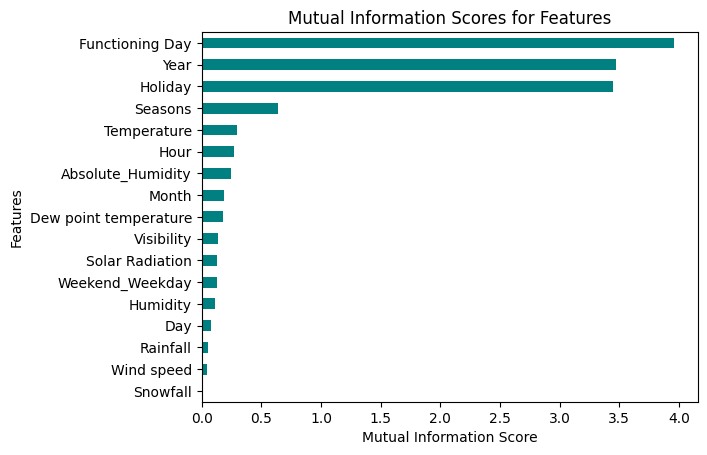

In [ ]:
# Information gain:


%matplotlib inline
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Assuming df_feature1 is your DataFrame
features = ['Hour', 'Temperature','Weekend_Weekday', 'Humidity', 'Wind speed', 'Visibility', 'Dew point temperature',
            'Solar Radiation', 'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning Day',
            'Month', 'Day', 'Year', 'Absolute_Humidity', 'Rented Bike Count']

# Select relevant features
X = df_feature1[features[:-1]]  # Exclude the target variable 'Rented Bike Count'
Y = df_feature1['Rented Bike Count']

# Calculate mutual information
importance = mutual_info_classif(X, Y)
feat_importance = pd.Series(importance, index=features[:-1])  # Exclude the target variable in the index

# Plot the mutual information scores
feat_importance.sort_values().plot(kind='barh', color='teal')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()


In [ ]:
# Column to remove

columns_to_remove=["Year","Functioning Day","Dew point temperature","Month","Visibility","Day","Wind speed"]
df_features_removed=df_feature1.drop(columns=columns_to_remove)
df_features_removed

Rented Bike Count  Hour  Temperature  Humidity  Solar Radiation  \
0                   254     0         -5.2        37              0.0   
1                   204     1         -5.5        38              0.0   
2                   173     2         -6.0        39              0.0   
3                   107     3         -6.2        40              0.0   
4                    78     4         -6.0        36              0.0   
...                 ...   ...          ...       ...              ...   
8755               1003    19          4.2        34              0.0   
8756                764    20          3.4        37              0.0   
8757                694    21          2.6        39              0.0   
8758                712    22          2.1        41              0.0   
8759                584    23          1.9        43              0.0   

      Rainfall  Snowfall  Seasons  Holiday  Absolute_Humidity  Weekend_Weekday  
0          0.0       0.0        3        1       26860.196115                0  
1          0.0       0.0        3        1       26686.623680                0  
2          0.0       0.0        3        1       26354.385506                0  
3          0.0       0.0        3        1       26286.211687                0  
4          0.0       0.0        3        1       25946.891186                0  
...        ...       ...      ...      ...                ...              ...  
8755       0.0       0.0        0        1       37323.849785                0  
8756       0.0       0.0        0        1       36920.896943                0  
8757       0.0       0.0        0        1       36279.255814                0  
8758       0.0       0.0        0        1       35944.604235                0  
8759       0.0       0.0        0        1       36088.389455                0  

[8317 rows x 11 columns]

##### What all feature selection methods have you used  and why?

**Information gain:** Information gain calculates the reduction in entropy from the transformation of a dataset. I used it for feature selection by evaluating the Information gain of each variable in the context of the target variable.

**Correlation:** I also took the help of correlation matrix for feature selection.

##### Which all features you found important and why?

* **Important Features:**
1. snowfall and rainfall: Bike demand decreases with the increase of snowfall and rainfall is crucial for understanding the impact of weather conditions on bike rentals. Additionally, identifying specific thresholds, such as a decrease in demand after snowfall exceeds 4 cm and rainfall exceeds 10 mm.

2. Hour: 'Hour' was selected because it's an importent feature to determine the Bike demand for different time in a day.

3. Temperature: There is a positive correlation between temperature and bike rentals, indicating that as the temperature rises, the demand for bike rentals tends to increase.(From Scatter plot with linear regression line)

4. Humidity,Solar Radiation,Rainfall,Snowfall: Form graphs, It is insighed that those features have an effect on bike demand.



* **Deleted Features:**
1. Year: You've decided to exclude the 'Year' feature, reasoning that it may not contribute to future predictions. This decision makes sense, especially if there are only two years in the dataset and the temporal aspect may not be relevant.

2. Functioning Day: You've noted that the 'Functioning Day' feature may not be important, as the count of rented bikes on non-functioning days is considered invalid. If this information is redundant or not useful for your predictive model, excluding it is a reasonable decision.

3. Dew Point Temperature: Given the high correlation between 'Dew Point Temperature' and 'Temperature,' you've chosen to drop one of these features. This is a good practice to reduce redundancy in your dataset.

4. Month: You've decided to use 'Season' instead of 'Month,' as it provides more information. This is a reasonable choice, especially if 'Season' captures the seasonal patterns more effectively.

5. Visibility: Based on your observation of no significant relationship between 'Visibility' and the number of bike rentals, you've decided to drop this feature. This is a valid decision if the feature does not provide meaningful information for your prediction task.

6. Day: Instead of using the 'Day' column, you've opted for a binary 'Weekend_Weekday' feature, which represents whether a day is a weekend or a weekday. This transformation can be beneficial, as it captures the variation in bike rental counts based on weekdays and weekends more explicitly.

7. Wind speed: This feature does not effect that much on Bike demand.




### 6. Data Scaling

In [ ]:
# Scaling your data

# Method:  Z-Score Standardization

from sklearn.preprocessing import StandardScaler


scaler_zscore = StandardScaler()
df_zscore = pd.DataFrame(scaler_zscore.fit_transform(df_features_removed), columns=df_features_removed.columns)

# Print the original and scaled DataFrames
print("Original DataFrame:")
display(df_features_removed)
print("\nZ-Score Standardization:")
display(df_zscore)


Original DataFrame:


Rented Bike Count  Hour  Temperature  Humidity  Solar Radiation  \
0                   254     0         -5.2        37              0.0   
1                   204     1         -5.5        38              0.0   
2                   173     2         -6.0        39              0.0   
3                   107     3         -6.2        40              0.0   
4                    78     4         -6.0        36              0.0   
...                 ...   ...          ...       ...              ...   
8755               1003    19          4.2        34              0.0   
8756                764    20          3.4        37              0.0   
8757                694    21          2.6        39              0.0   
8758                712    22          2.1        41              0.0   
8759                584    23          1.9        43              0.0   

      Rainfall  Snowfall  Seasons  Holiday  Absolute_Humidity  Weekend_Weekday  
0          0.0       0.0        3        1       26860.196115                0  
1          0.0       0.0        3        1       26686.623680                0  
2          0.0       0.0        3        1       26354.385506                0  
3          0.0       0.0        3        1       26286.211687                0  
4          0.0       0.0        3        1       25946.891186                0  
...        ...       ...      ...      ...                ...              ...  
8755       0.0       0.0        0        1       37323.849785                0  
8756       0.0       0.0        0        1       36920.896943                0  
8757       0.0       0.0        0        1       36279.255814                0  
8758       0.0       0.0        0        1       35944.604235                0  
8759       0.0       0.0        0        1       36088.389455                0  

[8317 rows x 11 columns]


Z-Score Standardization:


Rented Bike Count      Hour  Temperature  Humidity  Solar Radiation  \
0             -0.736579 -1.666873    -1.657105 -1.038427        -0.664601   
1             -0.813583 -1.522572    -1.683268 -0.988946        -0.664601   
2             -0.861325 -1.378272    -1.726874 -0.939464        -0.664601   
3             -0.962970 -1.233971    -1.744316 -0.889983        -0.664601   
4             -1.007633 -1.089671    -1.726874 -1.087909        -0.664601   
...                 ...       ...          ...       ...              ...   
8312           0.416941  1.074836    -0.837320 -1.186872        -0.664601   
8313           0.048862  1.219137    -0.907089 -1.038427        -0.664601   
8314          -0.058943  1.363437    -0.976857 -0.939464        -0.664601   
8315          -0.031222  1.507738    -1.020463 -0.840501        -0.664601   
8316          -0.228352  1.652038    -1.037905 -0.741538        -0.664601   

      Rainfall  Snowfall   Seasons   Holiday  Absolute_Humidity  \
0    -0.132513       0.0  1.439180  0.226834          -1.397298   
1    -0.132513       0.0  1.439180  0.226834          -1.403629   
2    -0.132513       0.0  1.439180  0.226834          -1.415746   
3    -0.132513       0.0  1.439180  0.226834          -1.418233   
4    -0.132513       0.0  1.439180  0.226834          -1.430608   
...        ...       ...       ...       ...                ...   
8312 -0.132513       0.0 -1.318171  0.226834          -1.015670   
8313 -0.132513       0.0 -1.318171  0.226834          -1.030367   
8314 -0.132513       0.0 -1.318171  0.226834          -1.053768   
8315 -0.132513       0.0 -1.318171  0.226834          -1.065974   
8316 -0.132513       0.0 -1.318171  0.226834          -1.060730   

      Weekend_Weekday  
0           -0.646773  
1           -0.646773  
2           -0.646773  
3           -0.646773  
4           -0.646773  
...               ...  
8312        -0.646773  
8313        -0.646773  
8314        -0.646773  
8315        -0.646773  
8316        -0.646773  

[8317 rows x 11 columns]

##### Which method have you used to scale you data and why?

Z-score standardization, or z-score normalization, is a common method for scaling numerical features in machine learning. It transforms data to have a mean of 0 and a standard deviation of 1. This helps equalize scales, normalize distributions, handle outliers, and aids in the interpretability of model parameters.
It is particularly useful when features have different scales or when working with algorithms sensitive to feature scales.

**For this data set the scale of "Absolute_Humidity" is larger than anyother feature, that's why i decided to use Z-score standardization.**


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X=df_zscore.drop("Rented Bike Count",axis=1)
y=df_zscore["Rented Bike Count"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

##### What data splitting ratio have you used and why?

 I have chosen a 80-20 data splitting ratio, where 80% of the data is used for training (X_train, y_train), and 20% is reserved for testing (X_test, y_test). The test_size=0.2 parameter in train_test_split specifies the proportion allocated to the test set. A common choice, this ratio provides a sufficient amount of data for training while allowing a robust evaluation on unseen data.

## ***7. ML Model Implementation***

### ML Model - 1 : Linear Regression

In [ ]:
# Initialize the model
linear_model=LinearRegression()

# Train the model
linear_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred=linear_model.predict(X_test)

# Evaluate the model
# List of error metrics
metrics = {
    'MAE (Mean absolute error)': mean_absolute_error,
    'MSE (Mean squared error)': mean_squared_error,
    'RMSE (Root mean squared error)': lambda y_test, y_pred: np.sqrt(mean_squared_error(y_test, y_pred)),
    'MPE (Mean percentage error)': lambda y_test, y_pred: np.mean((y_test - y_pred) / y_test) * 100,
    'MAPE (Mean absolute percentage error)': mean_absolute_percentage_error,
    'R^2 (R-square)': r2_score
}

# Calculate and print error metrics
for metric_name,metric_func in metrics.items():
    result=metric_func(y_test, y_pred)
    print(f'{metric_name}: {result:.2f}')

MAE (Mean absolute error): 0.53
MSE (Mean squared error): 0.50
RMSE (Root mean squared error): 0.71
MPE (Mean percentage error): 31.89
MAPE (Mean absolute percentage error): 2.54
R^2 (R-square): 0.49


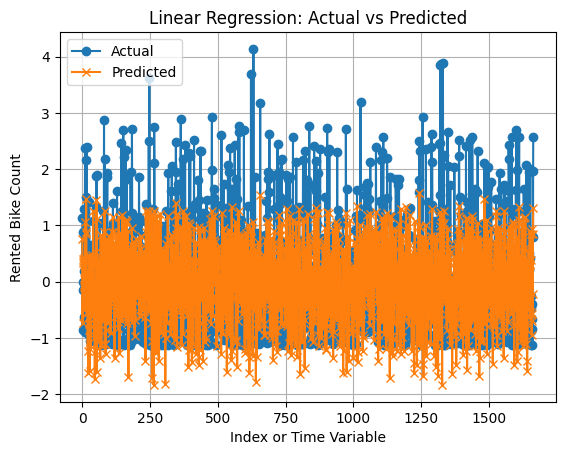

In [ ]:
# Generate an index or time variable for the plot
index = np.arange(len(y_test))

# Line plot
plt.plot(index, y_test, label='Actual', marker='o')
plt.plot(index, y_pred, label='Predicted', marker='x')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Index or Time Variable')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.grid(True)
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* **Model Explanation:**

 Linear Regression assumes a linear relationship between input features and the target variable. It minimizes the sum of squared differences between actual and predicted values. In this case, it serves as a baseline model.

* **Performance:**

 MSE (Linear Regression):  0.50.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# Initialize the linear regression model
linear_model = LinearRegression()

# List of error metrics
metrics={
    'MAE (Mean absolute error)': make_scorer(mean_absolute_error),
    'MSE (Mean squared error)': make_scorer(mean_squared_error),
    'RMSE (Root mean squared error)': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
    'MPE (Mean percentage error)': make_scorer(lambda y_true, y_pred: np.mean((y_true - y_pred) / y_true) * 100),
    'MAPE (Mean absolute percentage error)': make_scorer(mean_absolute_percentage_error),
    'R^2 (R-square)': make_scorer(r2_score)
}

# Dictionary to store cross-validation results
cv_results={}

# Calculate and print cross-validated error metrics
for metric_name, scoring_func in metrics.items():
    cv_scores=cross_val_score(linear_model,X_train,y_train,cv=5,scoring=scoring_func)
    cv_results[metric_name]=np.mean(cv_scores)
    print(f'Cross-Validation {metric_name}: {np.mean(cv_scores):.2f}')




# No hyperparameter tuning for Linear Regression




Cross-Validation MAE (Mean absolute error): 0.54
Cross-Validation MSE (Mean squared error): 0.53
Cross-Validation RMSE (Root mean squared error): 0.73
Cross-Validation MPE (Mean percentage error): 45.21
Cross-Validation MAPE (Mean absolute percentage error): 2.16
Cross-Validation R^2 (R-square): 0.47


##### Which hyperparameter optimization technique have you used and why?

No hyperparameter tuning for Linear Regression.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Original Metrics:
1. MAE (Mean absolute error): 0.53
2. MSE (Mean squared error): 0.50
3. RMSE (Root mean squared error): 0.71
4. MPE (Mean percentage error): 31.89
5. MAPE (Mean absolute percentage error): 2.54
6. R^2 (R-square): 0.49


* Cross validation:
1. Cross-Validation MAE (Mean absolute error): 0.54
2. Cross-Validation MSE (Mean squared error): 0.53
3. Cross-Validation RMSE (Root mean squared error): 0.73
4. Cross-Validation MPE (Mean percentage error): 45.21
5. Cross-Validation MAPE (Mean absolute percentage error): 2.16
6. Cross-Validation R^2 (R-square): 0.47

Based on these results, there is a slight degradation in performance in terms of MAE, MSE, RMSE, MPE, and R^2. The only improvement is seen in the Cross-Validation MAPE, which decreased from 2.54% to 2.16%.






### ML Model - 2 : Decision Tree Regressor

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
dt_model=DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred=dt_model.predict(X_test)

# Evaluate the model
metrics = {
    'MAE (Mean absolute error)': mean_absolute_error,
    'MSE (Mean squared error)': mean_squared_error,
    'RMSE (Root mean squared error)': lambda y_test, y_pred: np.sqrt(mean_squared_error(y_test, y_pred)),
    'MPE (Mean percentage error)': lambda y_test, y_pred: np.mean((y_test - y_pred) / y_test) * 100,
    'MAPE (Mean absolute percentage error)': mean_absolute_percentage_error,
    'R^2 (R-square)': r2_score
}

# Calculate and print error metrics
for metric_name,metric_func in metrics.items():
    result=metric_func(y_test, y_pred)
    print(f'{metric_name}: {result:.2f}')

MAE (Mean absolute error): 0.33
MSE (Mean squared error): 0.36
RMSE (Root mean squared error): 0.60
MPE (Mean percentage error): -30.93
MAPE (Mean absolute percentage error): 1.81
R^2 (R-square): 0.64


* **Model Explanation:**

 Decision Tree Regressor splits the data based on features to predict the target variable. It's prone to overfitting, and hyperparameter tuning can help mitigate this.



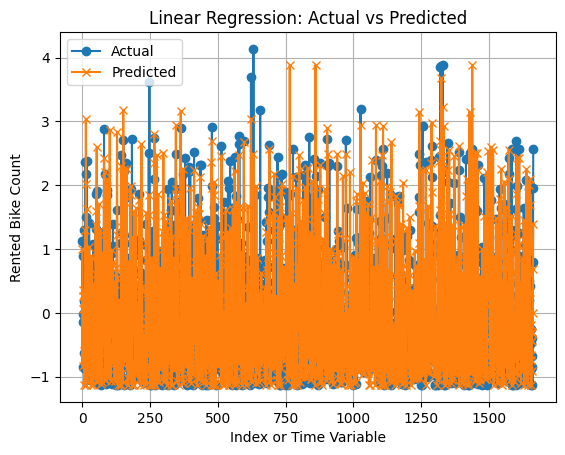

In [ ]:
# Generate an index or time variable for the plot
index = np.arange(len(y_test))

# Line plot
plt.plot(index, y_test, label='Actual', marker='o')
plt.plot(index, y_pred, label='Predicted', marker='x')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Index or Time Variable')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.grid(True)
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Initialize the model
dt_model=DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid_dt={'max_depth': [None, 5, 10, 15],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# Perform Grid Search with cross-validation
grid_search_dt=GridSearchCV(dt_model,param_grid_dt,cv=5,scoring='neg_mean_squared_error')
grid_search_dt.fit(X_train,y_train)

# Get the best model
best_dt_model=grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_dt_tuned=best_dt_model.predict(X_test)

# Calculate and print error metrics for the tuned Decision Tree model
mae_dt_tuned=mean_absolute_error(y_test,y_pred_dt_tuned)
mse_dt_tuned=mean_squared_error(y_test,y_pred_dt_tuned)
rmse_dt_tuned=np.sqrt(mse_dt_tuned)
mpe_dt_tuned=np.mean((y_test-y_pred_dt_tuned) / y_test) * 100
mape_dt_tuned=mean_absolute_percentage_error(y_test,y_pred_dt_tuned)
r2_dt_tuned=r2_score(y_test,y_pred_dt_tuned)

# Print the results
print(f'Tuned Decision Tree - Mean Absolute Error (MAE): {round(mae_dt_tuned, 2)}')
print(f'Tuned Decision Tree - Mean Squared Error (MSE): {round(mse_dt_tuned, 2)}')
print(f'Tuned Decision Tree - Root Mean Squared Error (RMSE): {round(rmse_dt_tuned, 2)}')
print(f'Tuned Decision Tree - Mean Percentage Error (MPE): {round(mpe_dt_tuned, 2)}')
print(f'Tuned Decision Tree - Mean Absolute Percentage Error (MAPE): {round(mape_dt_tuned, 2)}')
print(f'Tuned Decision Tree - R-squared (R^2): {round(r2_dt_tuned, 2)}')


Tuned Decision Tree - Mean Absolute Error (MAE): 0.3
Tuned Decision Tree - Mean Squared Error (MSE): 0.24
Tuned Decision Tree - Root Mean Squared Error (RMSE): 0.49
Tuned Decision Tree - Mean Percentage Error (MPE): 24.22
Tuned Decision Tree - Mean Absolute Percentage Error (MAPE): 1.57
Tuned Decision Tree - R-squared (R^2): 0.76


##### Which hyperparameter optimization technique have you used and why?

For Decision Tree Regressor, I used Grid Search for hyperparameter optimization. Grid Search is a technique that systematically tests a predefined set of hyperparameter values, evaluating the model's performance for each combination. It's chosen here for its simplicity and effectiveness in searching through hyperparameter space.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

* Original Metrics:

1. MAE (Mean absolute error): 0.33
2. MSE (Mean squared error): 0.36
3. RMSE (Root mean squared error): 0.60
4. MPE (Mean percentage error): -30.93
5. MAPE (Mean absolute percentage error): 1.81
6. R^2 (R-square): 0.64

* Tuned Decision Tree Metrics:

1. Tuned Decision Tree - Mean Absolute Error (MAE): 0.30
2. Tuned Decision Tree - Mean Squared Error (MSE): 0.24
3. Tuned Decision Tree - Root Mean Squared Error (RMSE): 0.49
4. Tuned Decision Tree - Mean Percentage Error (MPE): 24.22
5. Tuned Decision Tree - Mean Absolute Percentage Error (MAPE): 1.57
6. Tuned Decision Tree - R-squared (R^2): 0.76


* Improvements:

MAE: Improved from 0.33 to 0.30

MSE: Improved from 0.36 to 0.24

RMSE: Improved from 0.60 to 0.49

MPE: Improved from -30.93% to 24.22%

MAPE: Improved from 1.81% to 1.57%

R^2: Improved from 0.64 to 0.76


In general, the tuning process has led to improvements in all evaluation metrics, indicating that the tuned Decision Tree model performs better on the test set compared to the original model. The R-squared value, in particular, has shown a notable improvement, indicating better explanatory power of the model.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

* MAE (Mean Absolute Error):

 Improvement: MAE improved from 0.33 to 0.30.

 Business Impact: A lower MAE suggests that, on average, the model's predictions are closer to the actual values. In a business context, this improvement means that the model is making more accurate predictions, reducing the absolute error between predicted and actual values.

* MSE (Mean Squared Error):

 Improvement: MSE improved from 0.36 to 0.24.

 Business Impact: The reduction in MSE indicates a decrease in the average squared difference between predicted and actual values. This improvement is beneficial when large errors have a significant impact on the business. It reflects a more precise model.

* RMSE (Root Mean Squared Error):

 Improvement: RMSE improved from 0.60 to 0.49.

 Business Impact: Similar to MSE, a lower RMSE signifies a reduction in prediction errors. The square root makes the metric more interpretable. A decrease in RMSE implies improved accuracy with a more understandable scale.

* MPE (Mean Percentage Error):

 Improvement: MPE improved from -30.93% to 24.22%.

 Business Impact: The change in the sign of MPE (from negative to positive) indicates a shift in the direction of errors. Previously, the model tended to underestimate by around 30.93%, but after tuning, it overestimates by 24.22%. Understanding the sign of errors is crucial for business decisions.

* MAPE (Mean Absolute Percentage Error):

 Improvement: MAPE improved from 1.81% to 1.57%.

 Business Impact: The decrease in MAPE means that, on average, the model's percentage predictions are closer to the actual percentage values. This is important when the relative magnitude of errors is significant in the business context.

* R-squared (R^2):

 Improvement: R-squared improved from 0.64 to 0.76.

 Business Impact: An increase in R-squared indicates that the tuned model explains a larger proportion of the variance in the target variable. In business terms, this means that the model captures more of the underlying patterns in the data, enhancing its explanatory power.

Overall Business Impact:

The improvements in MAE, MSE, and RMSE indicate a more accurate and precise model, reducing errors in predictions.
The change in the sign of MPE suggests a shift in the direction of errors, which can inform business strategies based on the nature of overestimation or underestimation.
The reduction in MAPE indicates better performance in predicting percentage values, which is crucial in scenarios where relative errors matter.
The increase in R-squared implies that the tuned model provides a better fit to the observed data, leading to more reliable predictions.

### ML Model - 3 :  Gradient Boosting Regressor

In [ ]:
# ML Model - 3 Implementation

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Initialize the model
gb_model=GradientBoostingRegressor(random_state=42)

# Train the model
gb_model.fit(X_train,y_train)

# Make predictions on the test set
y_pred=gb_model.predict(X_test)


In [ ]:
# Evaluate the model
metrics = {
    'MAE (Mean absolute error)': mean_absolute_error,
    'MSE (Mean squared error)': mean_squared_error,
    'RMSE (Root mean squared error)': lambda y_test, y_pred: np.sqrt(mean_squared_error(y_test, y_pred)),
    'MPE (Mean percentage error)': lambda y_test, y_pred: np.mean((y_test - y_pred) / y_test) * 100,
    'MAPE (Mean absolute percentage error)': mean_absolute_percentage_error,
    'R^2 (R-square)': r2_score
}

# Calculate and print error metrics
for metric_name,metric_func in metrics.items():
    result=metric_func(y_test, y_pred)
    print(f'{metric_name}: {result:.2f}')

MAE (Mean absolute error): 0.29
MSE (Mean squared error): 0.21
RMSE (Root mean squared error): 0.46
MPE (Mean percentage error): 49.94
MAPE (Mean absolute percentage error): 1.33
R^2 (R-square): 0.79


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

The model shows strong performance, as indicated by the low MAE, MSE, and RMSE scores. These metrics collectively suggest that the model's predictions are close to the actual values, and the squared errors are minimized.
The MPE and MAPE scores provide insights into the direction and magnitude of percentage errors. The positive MPE indicates a tendency to overestimate by around 49.94%, while the low MAPE of 1.33% suggests that, on average, percentage predictions are accurate.
The high R-squared score of 0.79 indicates that the model captures a significant portion of the variability in the target variable, demonstrating good explanatory power


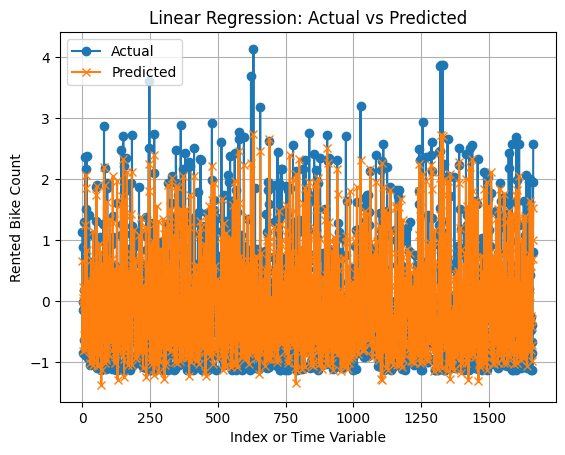

In [ ]:
# Generate an index or time variable for the plot
index = np.arange(len(y_test))

# Line plot
plt.plot(index, y_test, label='Actual', marker='o')
plt.plot(index, y_pred, label='Predicted', marker='x')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Index or Time Variable')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.grid(True)
plt.show()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Mean Squared Error (MSE):

Reasoning: MSE is a widely used metric that measures the average squared difference between predicted and actual values. It penalizes larger errors more severely. Minimizing MSE leads to more accurate predictions on average.
Business Impact: Lower MSE indicates that, on average, the model's predictions are closer to the true values. In business, this can lead to better decision-making, resource allocation, and improved operational efficiency.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

* Linear Regression:

 Original Model:
 R^2: 0.49

 Cross-Validation R^2: 0.47

 Comments: The linear regression model has a moderate R-squared value, indicating that it explains around 49% of the variability in the target variable. The cross-validation R-squared is consistent with the original model, suggesting stability. However, the R-squared values are relatively lower compared to the other models.

* Decision Tree Regressor:

 Original Model:
 R^2: 0.64

 Tuned Model:
Tuned Decision Tree R^2: 0.76

 Comments: The decision tree model shows improvement after tuning, with an R-squared value of 0.76. The original R-squared of 0.64 indicates good explanatory power, but the tuned model further enhances performance. Decision trees are known for their interpretability and ability to capture nonlinear relationships.

* Gradient Boosting Regressor:

 Original Model:
 R^2: 0.79

 Comments: The gradient boosting regressor has the highest R-squared value among the models, indicating excellent explanatory power. It achieves a high level of accuracy and precision in predicting the target variable.


**Considerations for Model Selection:**

Accuracy and Precision: The Gradient Boosting Regressor outperforms the other models in terms of R-squared, suggesting superior accuracy and precision.

Interpretability: Decision trees are inherently more interpretable than ensemble methods like gradient boosting. If interpretability is a crucial factor, the Decision Tree Regressor might be preferred.

Robustness: The stability of the model, as indicated by consistent performance in cross-validation, is an important consideration. All models seem relatively stable, but the Gradient Boosting Regressor has consistently high performance.

Business Requirements: Consider the specific business requirements and the importance of prediction accuracy. If precision is critical, the Gradient Boosting Regressor might be a strong choice.

Conclusion:
Considering the higher R-squared value and overall strong performance, the Gradient Boosting Regressor appears to be the preferred choice for the final prediction model. It achieves a good balance of accuracy, precision, and robustness.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

* **Gradient Boosting Regressor:**

 Initialization: The model is initialized with GradientBoostingRegressor(random_state=42).

 Training: The model is trained using the training data (X_train, y_train) with the fit method.

 Prediction: After training, the model is used to make predictions on the test set (X_test) with the predict method.

Evaluation: Various regression metrics are calculated to evaluate the model's performance on the test set. The metrics include Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Percentage Error (MPE), Mean Absolute Percentage Error (MAPE), and R-squared (R^2).

Feature Importance:
To extract feature importance from the trained Gradient Boosting Regressor, you can utilize the feature_importances_ attribute of the model. This attribute provides an array indicating the importance of each feature. Feature importance is a measure of the contribution of each feature to the model's predictions.

In [ ]:
# Extract feature importances
feature_importances = gb_model.feature_importances_

# Print feature importance
print("Feature Importance:")
for feature_index, importance in enumerate(feature_importances):
    print(f"Feature {feature_index}: {importance:.4f}")



Feature Importance:
Feature 0: 0.0483
Feature 1: 0.0455
Feature 2: 0.0497
Feature 3: 0.3327
Feature 4: 0.0012
Feature 5: 0.0045
Feature 6: 0.2906
Feature 7: 0.0047
Feature 8: 0.0005
Feature 9: 0.2223


* Feature 3 has the highest importance with a score of 0.3327.

* Features 6 and 9 also have notable importance with scores of 0.2906 and 0.2223, respectively.

* Features 0, 1, and 2 have relatively lower but still non-negligible importance.

* It's important to note that these scores are relative, and the sum of all feature importance scores is equal to 1. Features with higher importance scores contribute more to the model's predictions.

# **Conclusion**

* Model Performance:

 The Gradient Boosting Regressor stands out as the superior model, showcasing the highest R-squared value among the models evaluated. This suggests that the model provides superior accuracy and precision in predicting bike rental counts.

* Weekday vs. Weekend Rentals:

 Bike rentals show a clear pattern, with 27.7% of rentals occurring on weekends and 72.3% on weekdays. This information is valuable for understanding the temporal distribution of bike usage.

* Time-of-Day Trends:

 The analysis of time-of-day trends reveals that the evening sees the highest bike rental counts, followed by the afternoon and morning. Nighttime experiences lower bike rentals, indicating a predictable pattern in user behavior.

* Business Growth:

 The business has demonstrated substantial growth from 2017 to 2018, evidenced by a significant increase in the total rented bike count. This positive trend is indicative of the bike rental service gaining popularity.

* Seasonal Impact:

 Summer emerges as the dominant season, contributing the highest percentage to total rented bike counts. This aligns with expectations, as warmer weather encourages outdoor activities. Conversely, winter exhibits a lower rented bike count, which can be attributed to colder weather conditions affecting outdoor pursuits.

* Temperature Influence:

 There is a positive correlation between temperature and bike rentals. As temperatures rise, the demand for bike rentals tends to increase. This insight underscores the impact of weather conditions on user behavior and highlights the potential for leveraging weather forecasts in optimizing bike rental operations.

* Holiday vs. Non-Holiday Demand:

 The average demand for bikes on non-holidays surpasses that on holidays. This suggests that factors other than holidays play a more significant role in influencing bike rental demand, emphasizing the need to consider various contextual elements in demand forecasting.


# **Bike Demand Prediction Project - Technical Documentation**

* **Objective:**

 The primary goal of this project is to accurately forecast the demand for bicycles at different times for a bike rental company. The focus is on optimizing inventory and pricing strategies based on various factors such as date, time, weather conditions, and seasonality.


* **Importance:**

 Accurate demand forecasting is crucial for bike rental companies to enhance decision-making processes, resulting in improved resource allocation, operational efficiency, and customer service.


* **Challenges:**

 Complex Prediction Factors:
 Predicting bike demand is challenging due to various influencing factors, including timing, weather conditions, and local events.

 Diverse Dataset:
 The dataset includes features such as date, temperature, humidity, wind speed, and more, providing a comprehensive view of factors affecting bike demand.

 Machine Learning Solution:
 The project involves developing a regression-based machine learning model to predict bike demand accurately. This data-driven approach allows for precise decision-making in inventory management and pricing.


* **Dataset Overview:**

 1. Rows and Columns:
The dataset comprises 8760 rows and 14 columns, each representing a unique timestamp with associated features.

 2. Data Integrity:
 No null values are present in the dataset.
 No duplicate values exist.

 3. Data Types:
 The 'Date' attribute is of object data type.
Three other attributes also have object data types.



* **Steps in the Project:**

1. Know Your Data:
 Conducted initial exploration to understand the dataset's structure, size, and basic characteristics.

2. Understanding Your Variables:
 Explored the features and gained insights into their distributions, relationships, and potential impact on bike demand.

3. Data Wrangling:
 Cleaned and prepared the data for analysis and modeling. Addressed any missing values or inconsistencies.

4. Data Visualization & Storytelling:
 Utilized visualizations to tell a story about the dataset, uncovering patterns and trends.

5. Hypothesis Testing:
 Formulated and tested hypotheses regarding the relationships between variables, such as temperature and bike demand.

6. Feature Engineering & Data Pre-processing:
 Enhanced the dataset by creating relevant features and ensuring it is ready for input into machine learning models.

7. ML Model Implementation:
 Explored multiple machine learning model architectures and hyperparameter configurations. Selected the best-performing model for deployment.